In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Veriyi yükle
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Temel istatistikleri çıkar
data_description = data.describe()

# Temel istatistikleri ekrana yazdır
print(data_description)

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

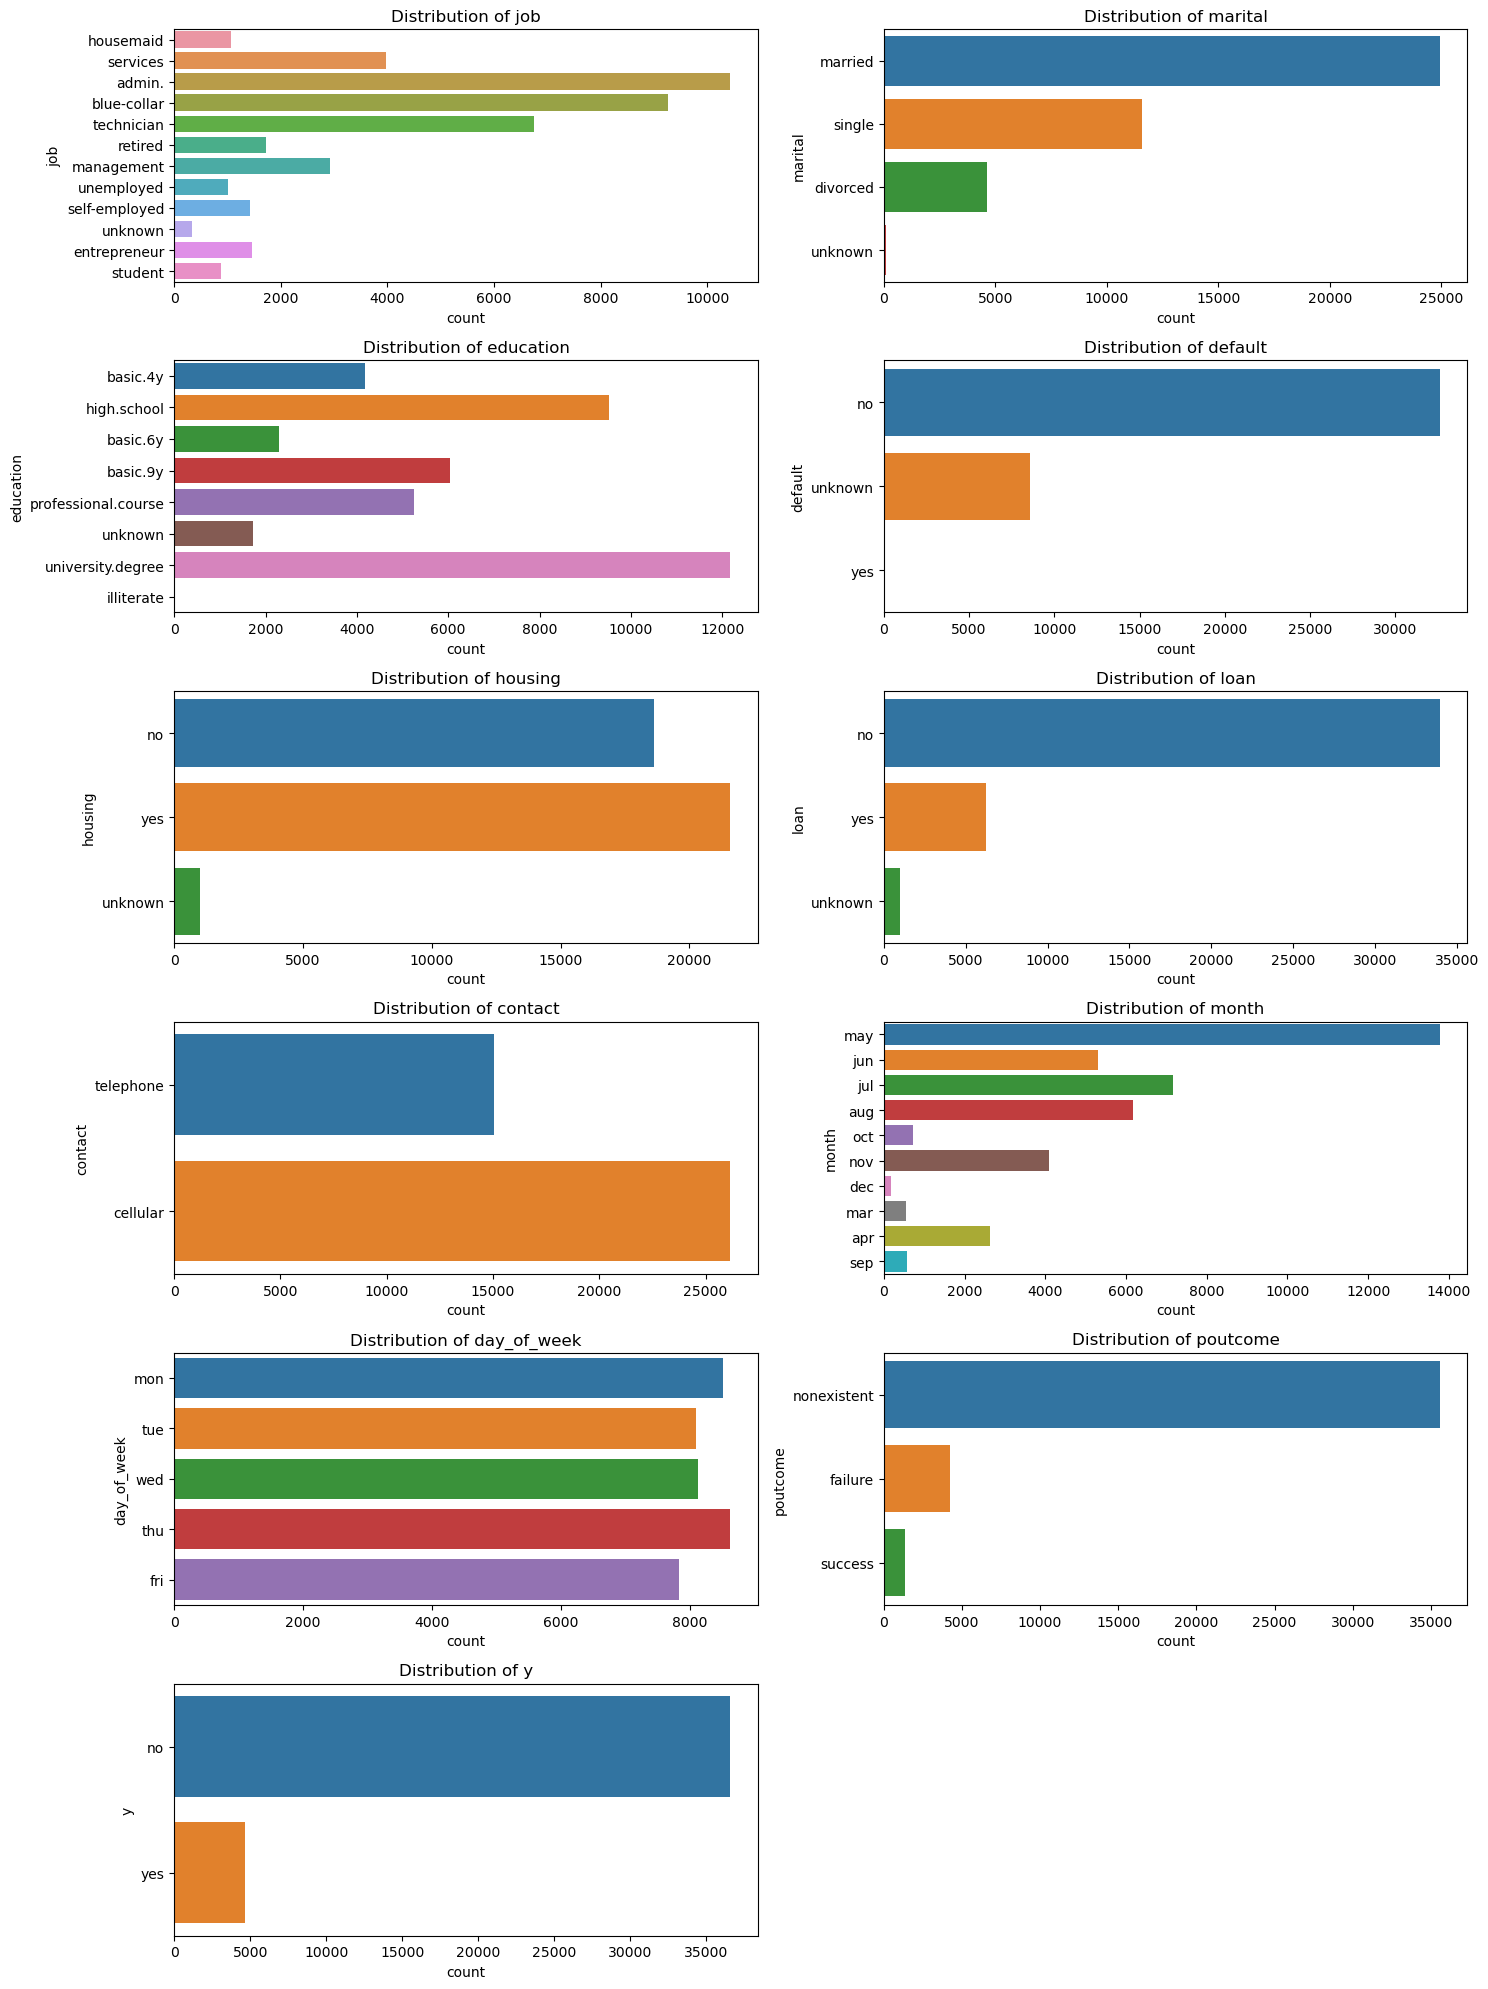

In [14]:
# Kategorik sütunları seçme
categorical_columns = data.select_dtypes(include=['object']).columns

# Kategorik değişkenlerin dağılımını görselleştirme
plt.figure(figsize=(15, 20))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns)//2 + 1, 2, i)
    sns.countplot(y=column, data=data)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

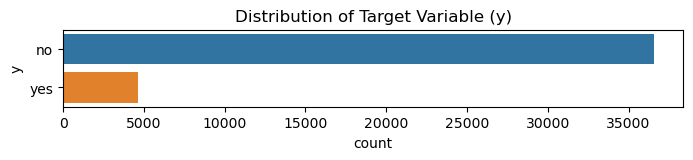

In [35]:
# Hedef değişkenin dağılımı
plt.figure(figsize=(8, 1))
sns.countplot(y='y', data=data)
plt.title('Distribution of Target Variable (y)')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

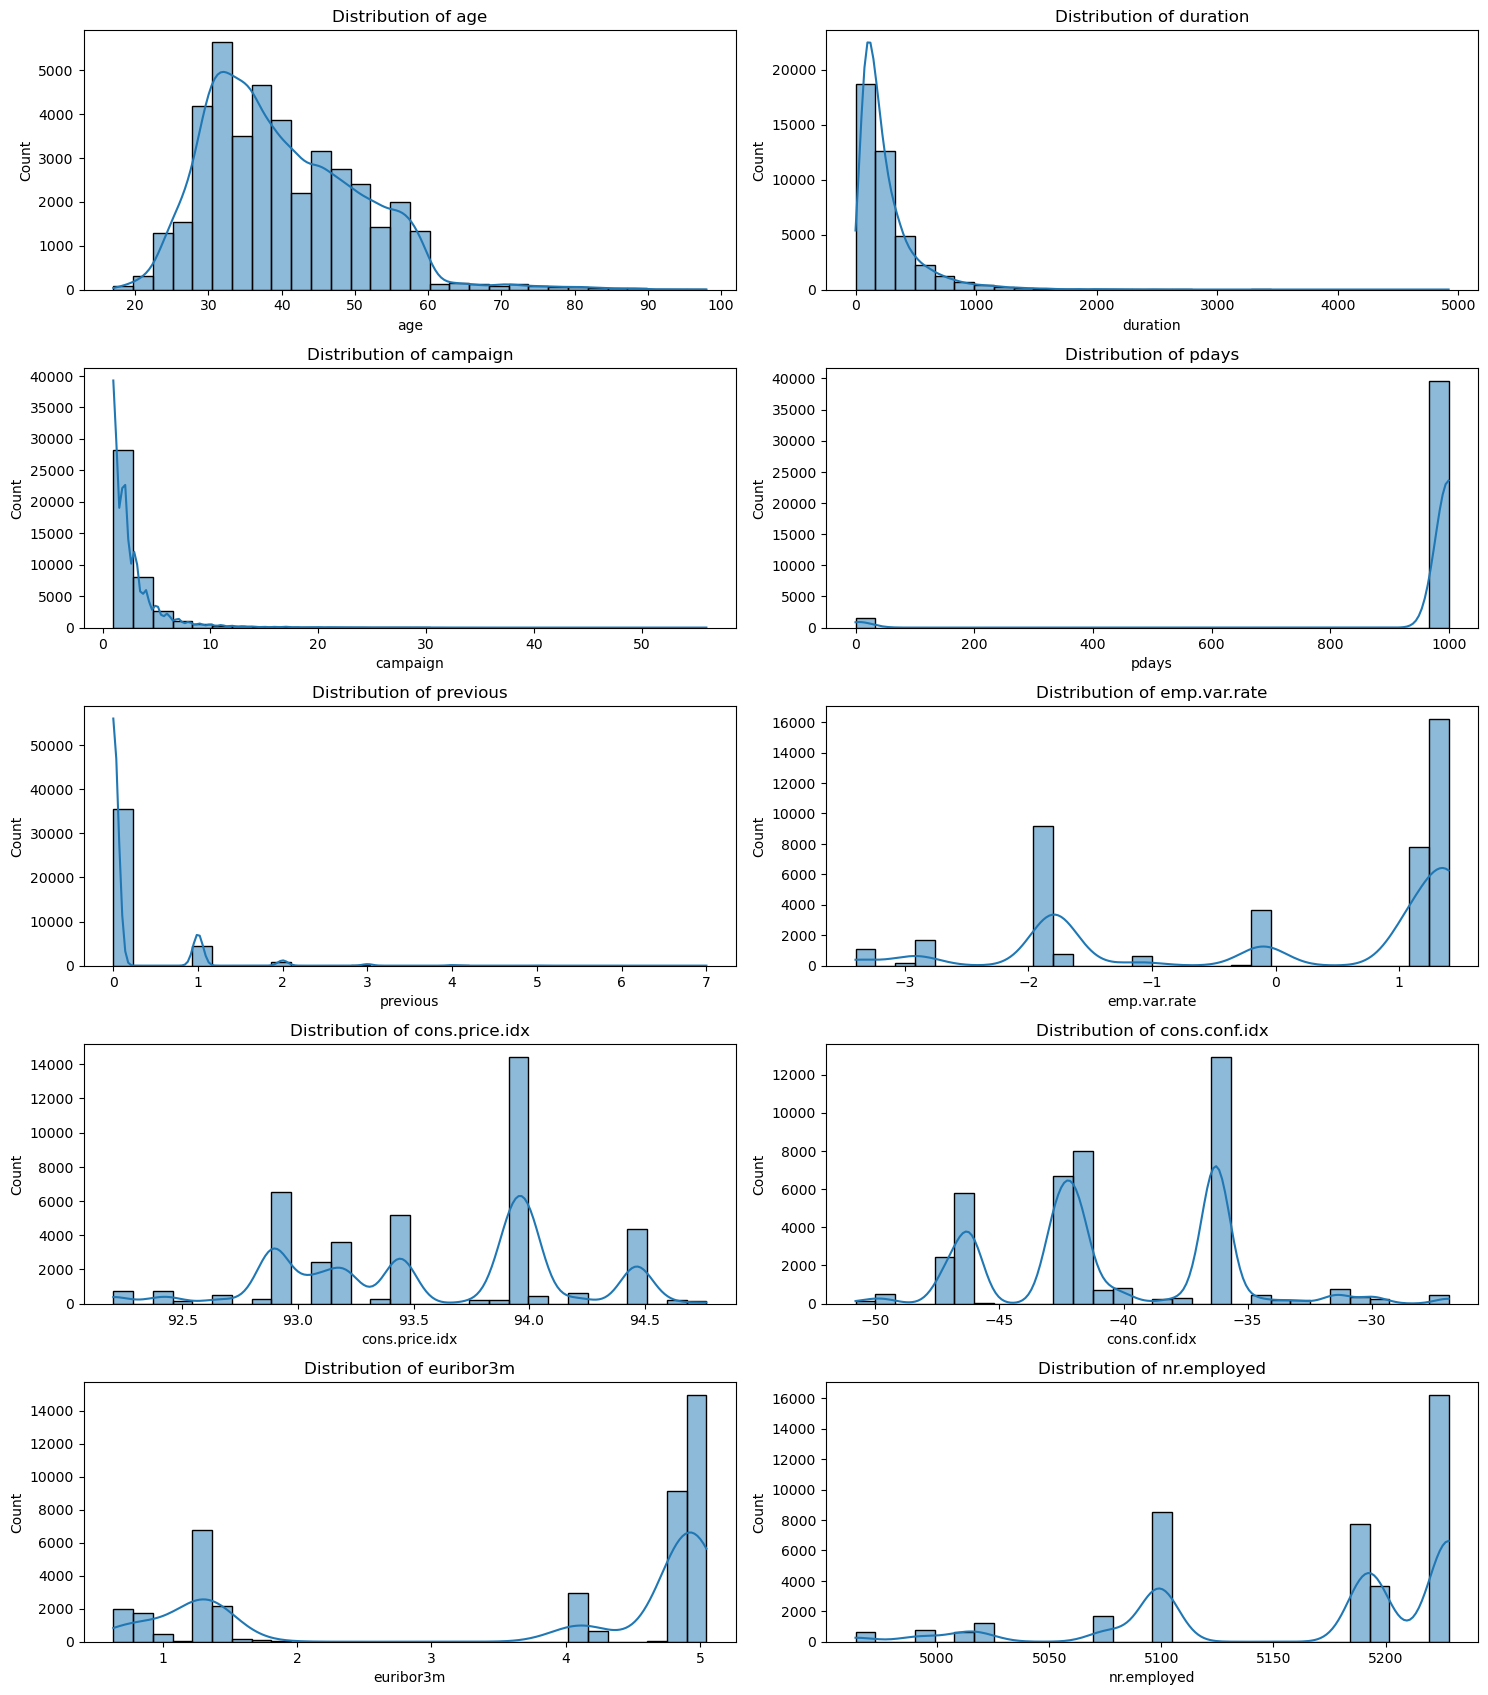

In [14]:
# Sayısal sütunları seçme
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Sonsuz değerleri NaN olarak ayarlama
data[numeric_columns] = data[numeric_columns].replace([np.inf, -np.inf], np.nan)

# Sayısal değişkenlerin dağılımını görselleştirme
plt.figure(figsize=(15, 20))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns)//2 + 1, 2, i)
    sns.histplot(data[column].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


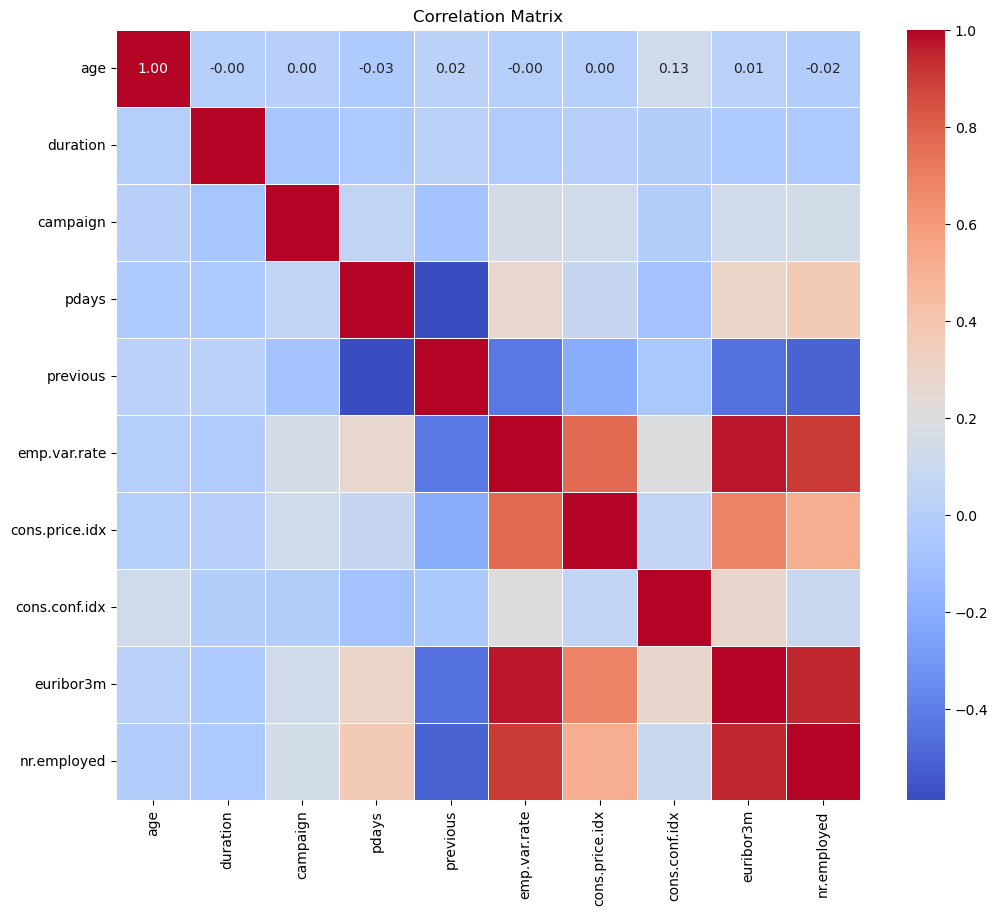

In [55]:
# Korelasyon matrisi
correlation_matrix = data[numeric_columns].corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_27328\3572057780.py:23: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  axes[i, j].annotate(f"{correlation_matrix.iloc[i, j]:.2f}", (0.5, 0.5), textcoords='axes fraction', ha='center', va='center', fontsize=12)
C:\Users\USER\AppData\Local\Temp\ipykernel_27328\3572057780.py:23: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  axes[i, j].annotate(f"{correlation_matrix.iloc[i, j]:.2f}", (0.5, 0.5), textcoords='axes fraction', ha='center', va='center', fontsize=12)
C:\Users\USER\AppData\Local\Temp\ipykernel_27328\3572057780.py:23: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  axes[i, j].annotate(f"{correlation_matrix.iloc[i, j]:.2f}", (0.5, 0.5), textcoords='axes fraction', ha='center', va='center', fontsize=12)
C:\Users\USER\AppData\Loc

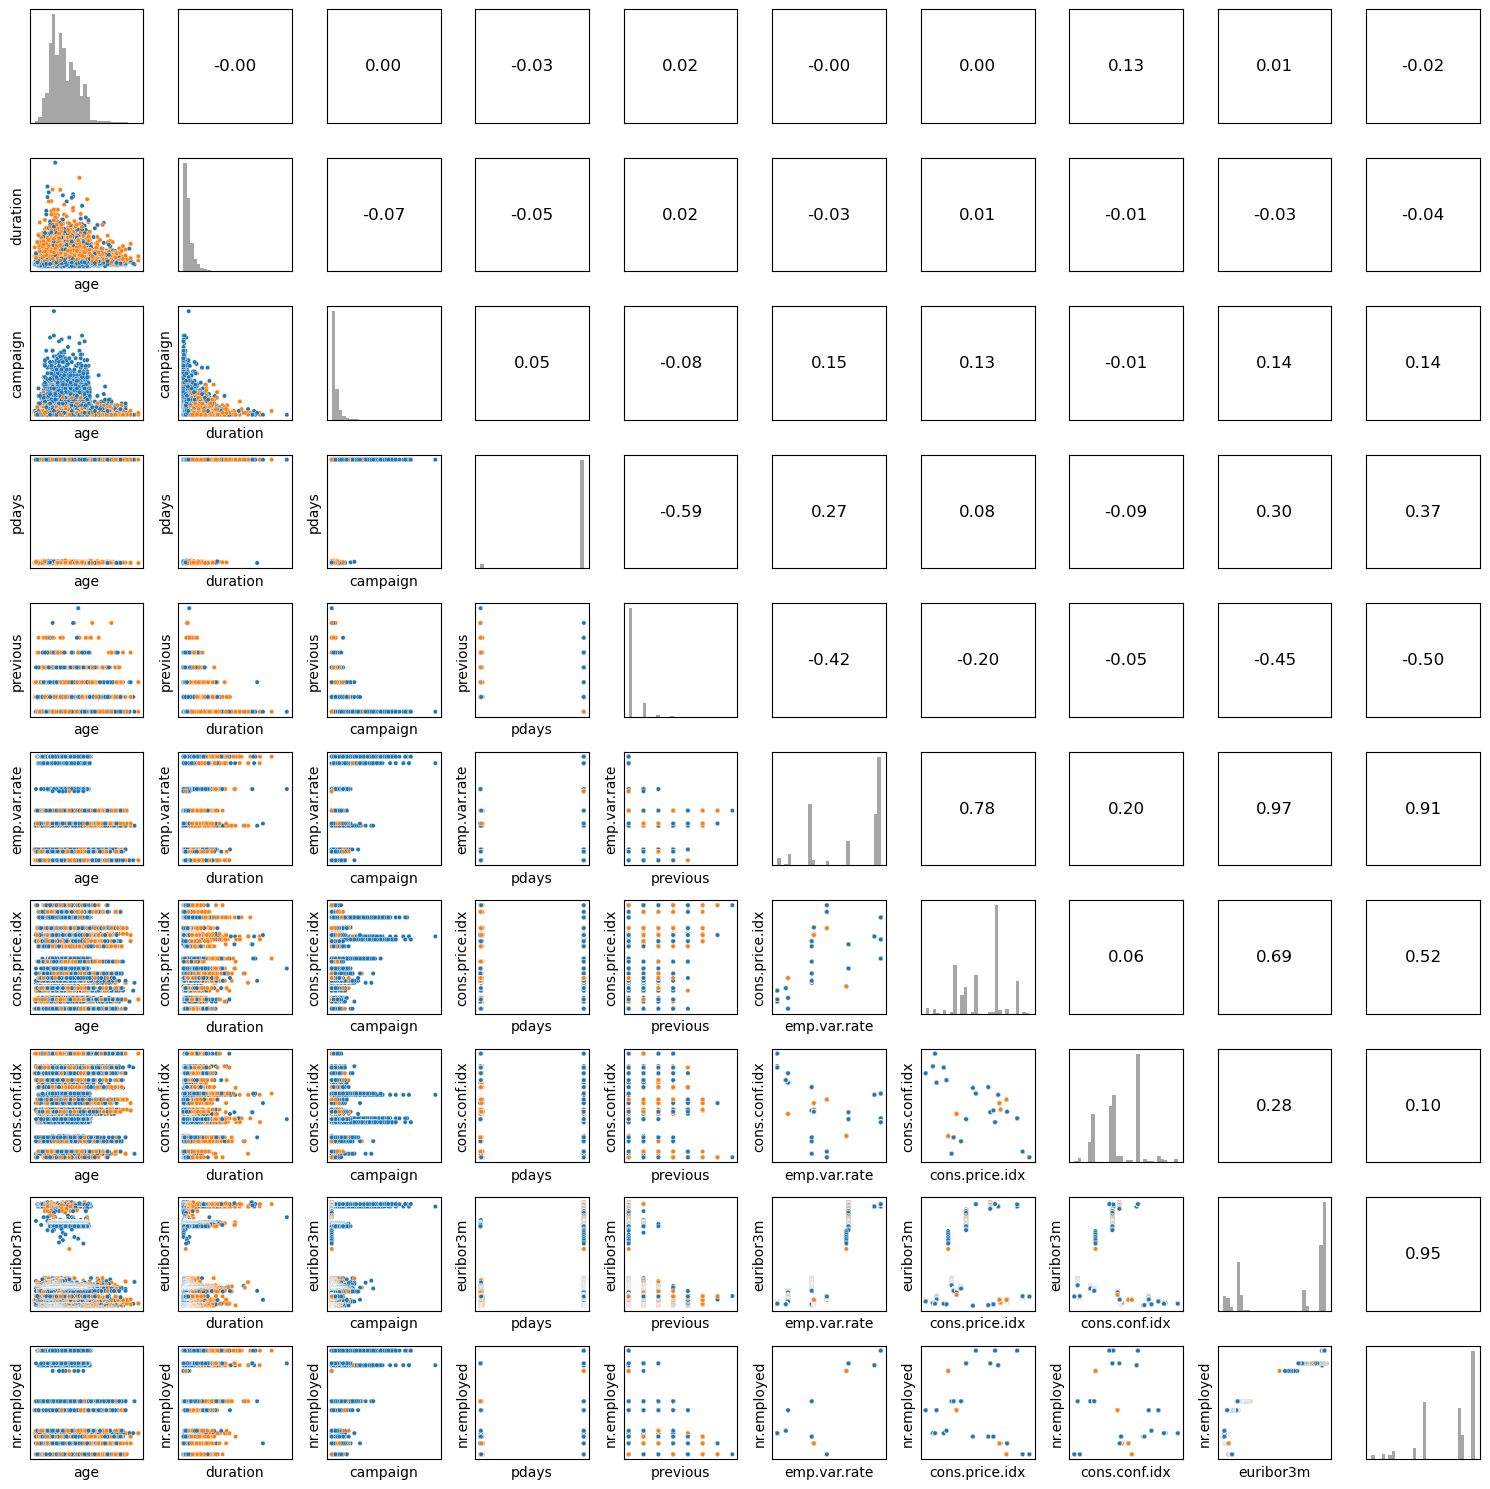

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yükle
data = pd.read_csv('/mnt/data/bank-additional-full.csv', sep=';')

# Sayısal sütunları seçme
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data_numeric = data[numeric_columns]

# Sonsuz değerleri NaN olarak ayarlama
data_numeric = data_numeric.replace([np.inf, -np.inf], np.nan)

# Korelasyon matrisi
correlation_matrix = data_numeric.corr()

# Plot oluşturma
fig, axes = plt.subplots(len(numeric_columns), len(numeric_columns), figsize=(15, 15))

for i in range(len(numeric_columns)):
    for j in range(len(numeric_columns)):
        if i == j:
            # Diagonal'de histplot
            axes[i, j].hist(data_numeric[numeric_columns[i]].dropna(), bins=30, color='gray', alpha=0.7)
            axes[i, j].set_yticks([])
            axes[i, j].set_xticks([])
        elif i < j:
            # Üst üçgende korelasyon değerleri
            axes[i, j].annotate(f"{correlation_matrix.iloc[i, j]:.2f}", (0.5, 0.5), textcoords='axes fraction', ha='center', va='center', fontsize=12)
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])
        else:
            # Alt üçgende scatter plot (farklı renklerde)
            sns.scatterplot(x=data_numeric[numeric_columns[j]], y=data_numeric[numeric_columns[i]], hue=data['y'], s=10, ax=axes[i, j], palette=["#1f77b4", "#ff7f0e"], legend=None)
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])

# Plot ayarları
plt.tight_layout()
plt.show()


In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Veriyi yükle
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Eksik verileri kontrol etme ve doldurma
data.ffill(inplace=True)

# Sayısal ve kategorik özellikleri belirleme
numeric_features = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
categorical_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

# Sayısal ve kategorik özellikler için transformerlar
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Kolon transformerı
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Pipeline oluşturma
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Veriyi ön işleme tabi tutma
data_processed = pipeline.fit_transform(data)

# Hedef değişkeni çıkarma
y = data['y']

# Ön işlenmiş veri ve hedef değişken
data_processed_df = pd.DataFrame(data_processed)
data_processed_df['y'] = y.values

# Model oluşturma ve eğitme
model = RandomForestClassifier()
model.fit(data_processed_df.drop(columns=['y']), y)

# Özellik önem skoru
feature_importances = model.feature_importances_

# Özellik isimlerini elde etme
# Numeric features
feature_names = numeric_features

# OneHotEncoder'dan kategorik özellik isimlerini almak
onehot_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.append(feature_names, onehot_feature_names)

# Özellik önem skorlarını bir DataFrame olarak gösterme
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                          Feature    Importance
1                        duration  2.997854e-01
8                       euribor3m  1.006122e-01
0                             age  8.595011e-02
9                     nr.employed  6.242348e-02
2                        campaign  4.268265e-02
3                           pdays  2.655812e-02
5                    emp.var.rate  2.428773e-02
7                   cons.conf.idx  2.399140e-02
6                  cons.price.idx  2.034767e-02
52               poutcome_success  1.993702e-02
34                    housing_yes  1.978141e-02
4                        previous  1.438171e-02
36                       loan_yes  1.327392e-02
21                marital_married  1.318797e-02
29    education_university.degree  1.251095e-02
22                 marital_single  1.185513e-02
48                day_of_week_thu  1.179759e-02
26          education_high.school  1.160555e-02
50                day_of_week_wed  1.140165e-02
47                day_of_week_mon  1.127

In [41]:
# Eşik değer belirleme
threshold = 0.01

# Düşük önem skoruna sahip özellikleri belirleme
low_importance_features = feature_importance_df[feature_importance_df['Importance'] < threshold]['Feature'].tolist()

# Kategorik özelliklerin isimlerini orijinal sütun isimleri ile eşleştirme
onehot_categories = pipeline.named_steps['preprocessor'].named_transformers_['cat'].categories_

categorical_feature_mapping = {}
start_idx = 0
for cat_feature, categories in zip(categorical_features, onehot_categories):
    end_idx = start_idx + len(categories) - 1  # Drop first olduğu için -1
    categorical_feature_mapping[cat_feature] = feature_names[start_idx:end_idx].tolist()
    start_idx = end_idx

# Düşük öneme sahip orijinal kategorik özellikleri belirleme
low_importance_original_features = []
for cat_feature, mapped_features in categorical_feature_mapping.items():
    if any(feature in low_importance_features for feature in mapped_features):
        low_importance_original_features.append(cat_feature)

# Tüm düşük öneme sahip özellikleri belirleme
low_importance_features_all = low_importance_original_features + [f for f in numeric_features if f in low_importance_features]

# Orijinal veri setinden düşük önem skoruna sahip özellikleri çıkarma
data_reduced = data.drop(columns=low_importance_features_all)

print("Removed features:", low_importance_features_all)
print("Remaining features:", data_reduced.columns.tolist())


Removed features: ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Remaining features: ['age', 'default', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [42]:
# Temel istatistikleri çıkar
data_description = data_reduced.describe()

# Temel istatistikleri ekrana yazdır
print(data_description)


               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

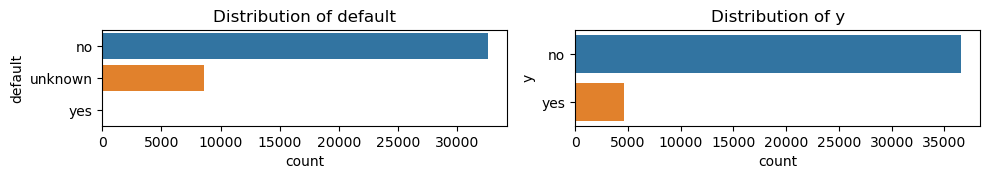

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kategorik sütunları seçme
categorical_columns = data_reduced.select_dtypes(include=['object']).columns

# Kategorik değişkenlerin dağılımını görselleştirme
plt.figure(figsize=(10, 3))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns)//2 + 1, 2, i)
    sns.countplot(y=column, data=data_reduced)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


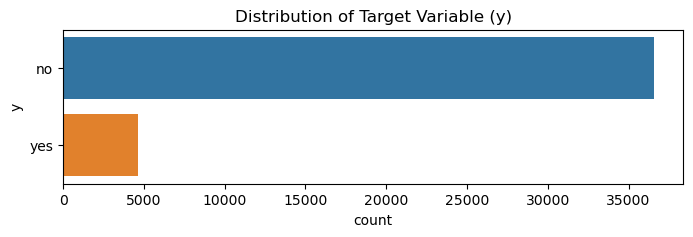

In [50]:
# Hedef değişkenin dağılımı
plt.figure(figsize=(8, 2))
sns.countplot(data=data_reduced, y='y')
plt.title('Distribution of Target Variable (y)')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_27328\1580402149.py:23: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  axes[i, j].annotate(f"{correlation_matrix.iloc[i, j]:.2f}", (0.5, 0.5), textcoords='axes fraction', ha='center', va='center', fontsize=12)
C:\Users\USER\AppData\Local\Temp\ipykernel_27328\1580402149.py:23: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  axes[i, j].annotate(f"{correlation_matrix.iloc[i, j]:.2f}", (0.5, 0.5), textcoords='axes fraction', ha='center', va='center', fontsize=12)
C:\Users\USER\AppData\Local\Temp\ipykernel_27328\1580402149.py:23: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  axes[i, j].annotate(f"{correlation_matrix.iloc[i, j]:.2f}", (0.5, 0.5), textcoords='axes fraction', ha='center', va='center', fontsize=12)
C:\Users\USER\AppData\Loc

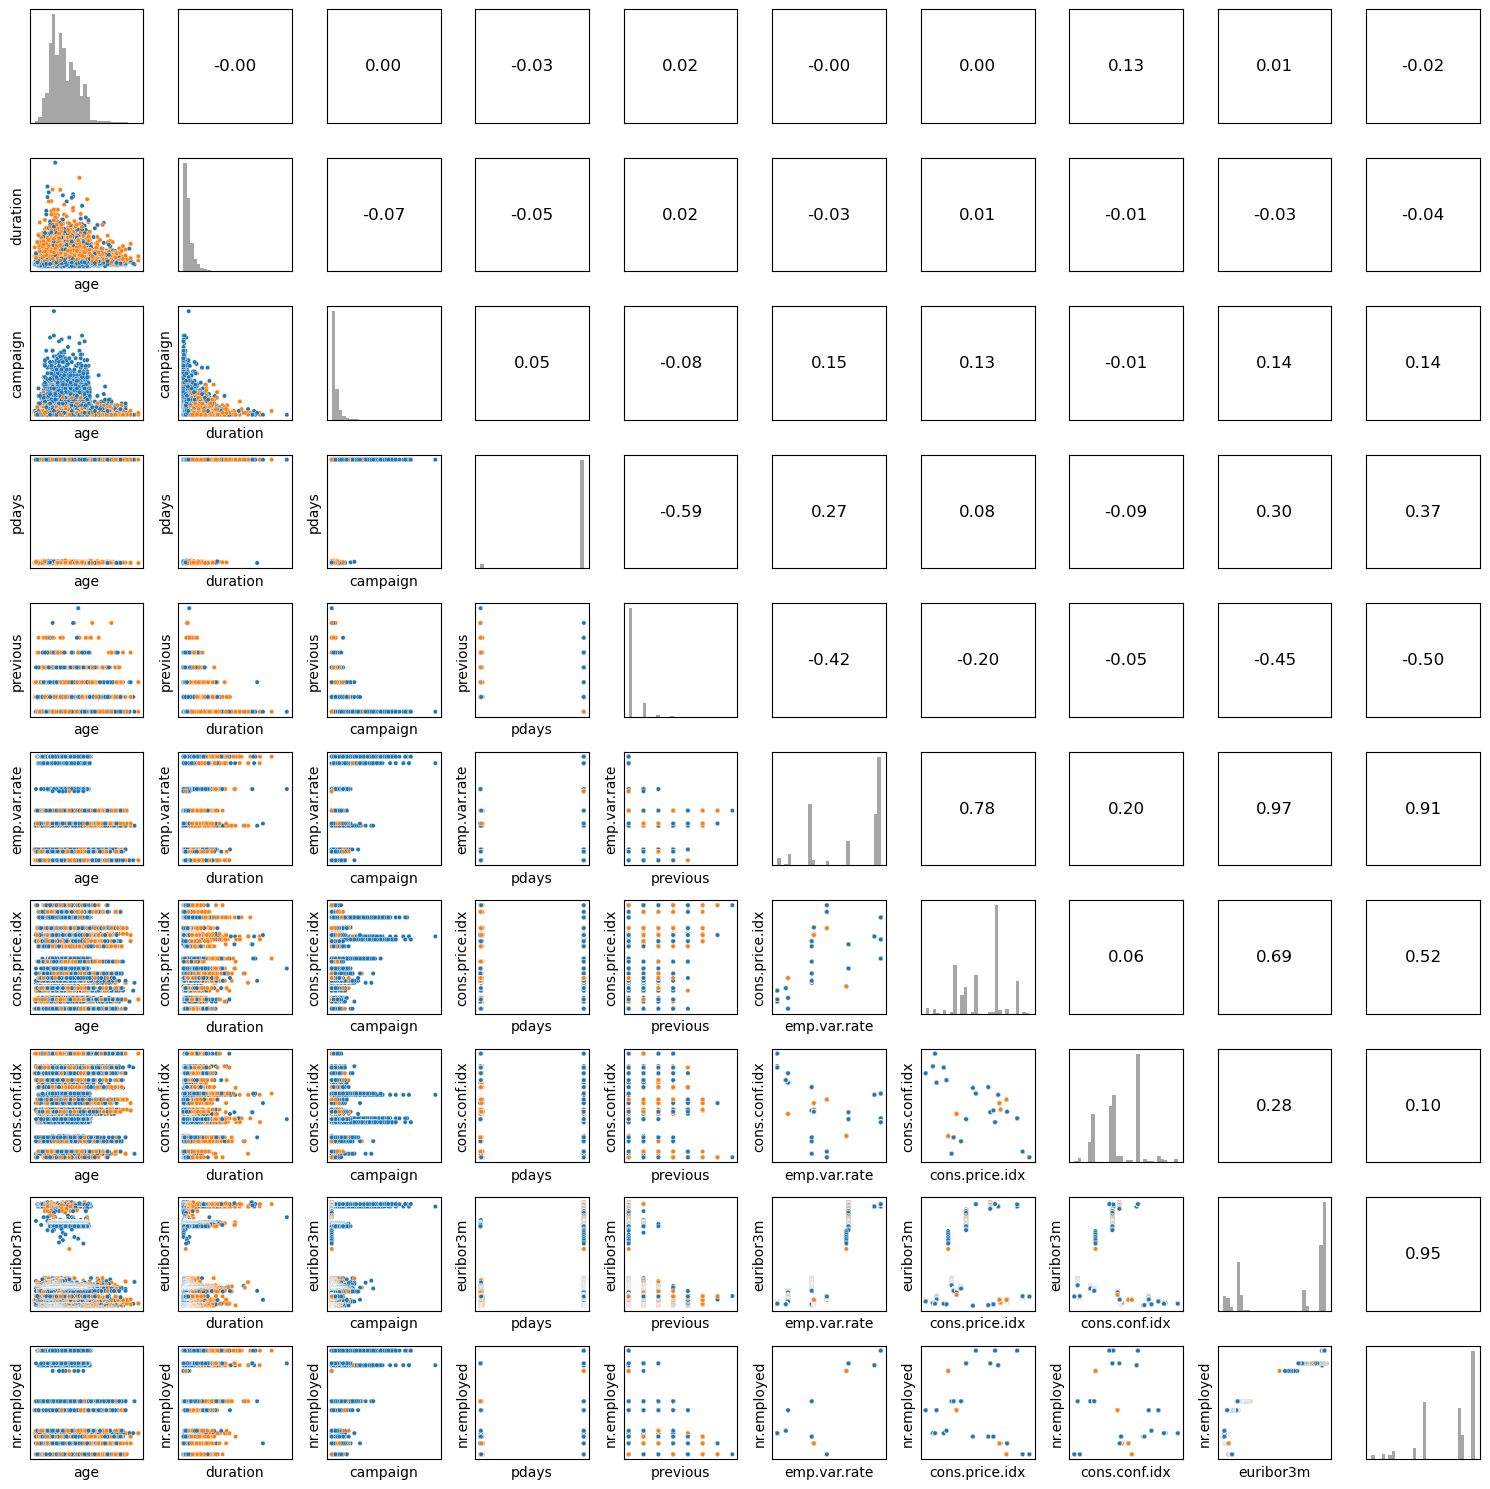

In [57]:
# Sayısal sütunları seçme
numeric_columns = data_reduced.select_dtypes(include=['int64', 'float64']).columns
data_numeric = data_reduced[numeric_columns]

# Sonsuz değerleri NaN olarak ayarlama
data_numeric = data_numeric.replace([np.inf, -np.inf], np.nan)

# Korelasyon matrisi
correlation_matrix = data_numeric.corr()

# Plot oluşturma
fig, axes = plt.subplots(len(numeric_columns), len(numeric_columns), figsize=(15, 15))

for i in range(len(numeric_columns)):
    for j in range(len(numeric_columns)):
        if i == j:
            # Diagonal'de histplot
            axes[i, j].hist(data_numeric[numeric_columns[i]].dropna(), bins=30, color='gray', alpha=0.7)
            axes[i, j].set_yticks([])
            axes[i, j].set_xticks([])
        elif i < j:
            # Üst üçgende korelasyon değerleri
            axes[i, j].annotate(f"{correlation_matrix.iloc[i, j]:.2f}", (0.5, 0.5), textcoords='axes fraction', ha='center', va='center', fontsize=12)
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])
        else:
            # Alt üçgende scatter plot (farklı renklerde)
            sns.scatterplot(x=data_numeric[numeric_columns[j]], y=data_numeric[numeric_columns[i]], hue=data_reduced['y'], s=10, ax=axes[i, j], palette=["#1f77b4", "#ff7f0e"], legend=None)
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])

# Plot ayarları
plt.tight_layout()
plt.show()



In [58]:
from sklearn.model_selection import train_test_split

# Hedef değişkeni (y) ve bağımsız değişkenleri (X) ayırma
X = data_reduced.drop(columns=['y'])
y = data_reduced['y']

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 32950
Test set size: 8238


Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.64      0.47      0.54       935

    accuracy                           0.91      8238
   macro avg       0.79      0.72      0.75      8238
weighted avg       0.90      0.91      0.90      8238

Accuracy Score: 0.9101723719349356
Confusion Matrix:
[[7062  241]
 [ 499  436]]


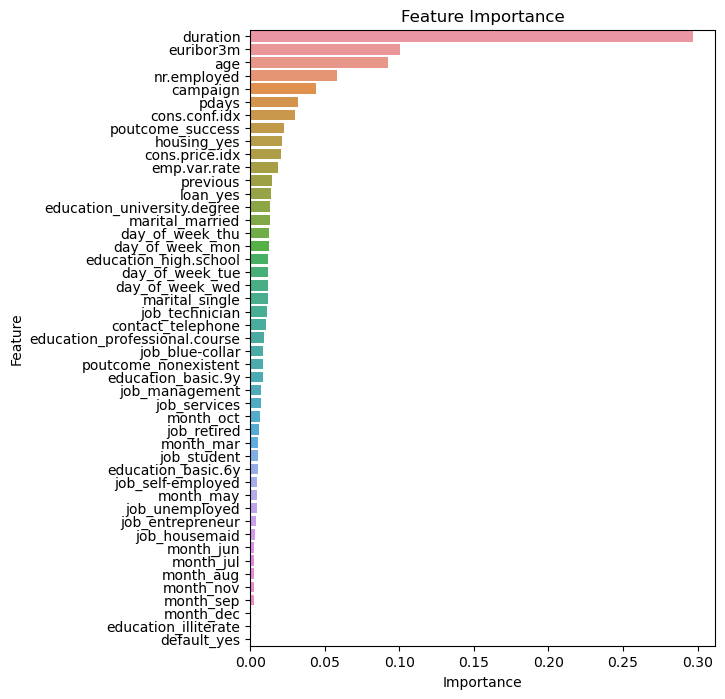

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Veriyi yükle
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Eksik verileri kontrol etme ve doldurma
data.replace('unknown', np.nan, inplace=True)
data.ffill(inplace=True)

# Hedef değişkeni (y) ve bağımsız değişkenleri (X) ayırma
X = data.drop(columns=['y'])
y = data['y']

# Sayısal ve kategorik özellikleri belirleme
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Sayısal ve kategorik özellikler için transformerlar
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Kolon transformerı
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Pip
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Veriyi ön işleme tabi tutma
X_processed = pipeline.fit_transform(X)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Model oluşturma
model = RandomForestClassifier(random_state=42)

# Modeli eğitim seti üzerinde eğitme
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Modelin performansını değerlendirme
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Özellik isimlerini elde etme
numeric_feature_names = numeric_features
categorical_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = numeric_feature_names + list(categorical_feature_names)

# Özellik önem skorlarını görselleştirme
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found:  {'classifier__bootstrap': False, 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.68      0.47      0.55       935

    accuracy                           0.91      8238
   macro avg       0.81      0.72      0.75      8238
weighted avg       0.91      0.91      0.91      8238

Accuracy Score: 0.9149065307113377
Confusion Matrix:
[[7100  203]
 [ 498  437]]


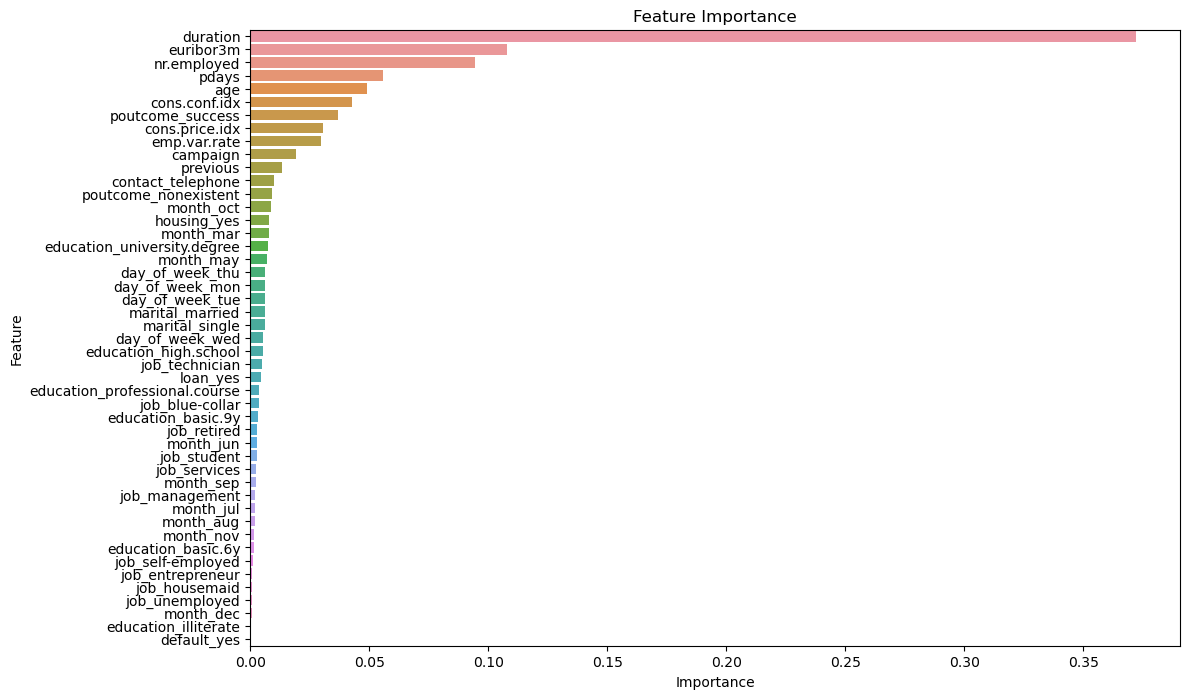

In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Veriyi yükle
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Eksik verileri kontrol etme ve doldurma
data.replace('unknown', np.nan, inplace=True)
data.ffill(inplace=True)

# Hedef değişkeni (y) ve bağımsız değişkenleri (X) ayırma
X = data.drop(columns=['y'])
y = data['y']

# Sayısal ve kategorik özellikleri belirleme
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Sayısal ve kategorik özellikler için transformerlar
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Kolon transformerı
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Pipeline oluşturma
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Hiperparametre grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Grid Search CV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid Search CV fit
grid_search.fit(X_train, y_train)

# En iyi parametreler
print("Best parameters found: ", grid_search.best_params_)

# En iyi modeli al
best_model = grid_search.best_estimator_

# Test seti üzerinde tahmin yapma
y_pred = best_model.predict(X_test)

# Modelin performansını değerlendirme
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Özellik isimlerini elde etme
numeric_feature_names = numeric_features
categorical_feature_names = best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = numeric_feature_names + list(categorical_feature_names)

# Özellik önem skorlarını görselleştirme
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': best_model.named_steps['classifier'].feature_importances_}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'classifier__bootstrap': True, 'classifier__max_depth': 30, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 287}
Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.69      0.46      0.55       935

    accuracy                           0.91      8238
   macro avg       0.81      0.72      0.75      8238
weighted avg       0.91      0.91      0.91      8238

Accuracy Score: 0.9146637533381888
Confusion Matrix:
[[7107  196]
 [ 507  428]]


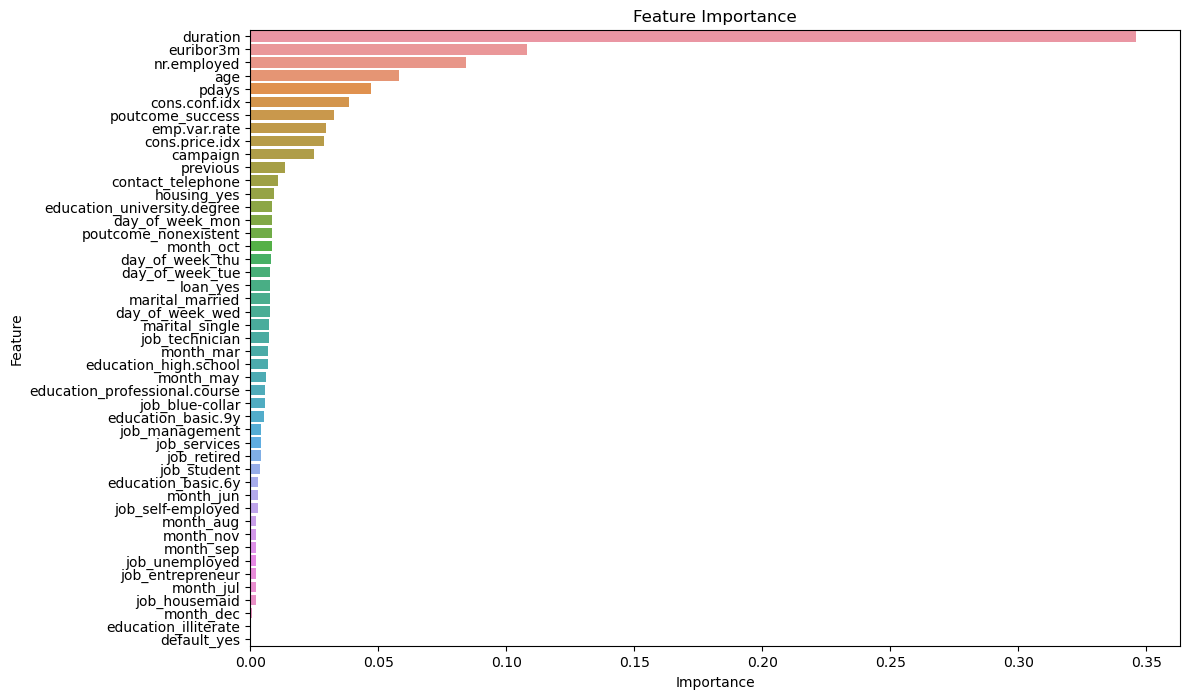

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from scipy.stats import randint

# Veriyi yükle
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Eksik verileri kontrol etme ve doldurma
data.replace('unknown', np.nan, inplace=True)
data.ffill(inplace=True)

# Hedef değişkeni (y) ve bağımsız değişkenleri (X) ayırma
X = data.drop(columns=['y'])
y = data['y']

# Sayısal ve kategorik özellikleri belirleme
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Sayısal ve kategorik özellikler için transformerlar
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Kolon transformerı
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Pipeline oluşturma
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Hiperparametre aralıkları
param_distributions = {
    'classifier__n_estimators': randint(100, 300),
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': randint(2, 11),
    'classifier__min_samples_leaf': randint(1, 5),
    'classifier__bootstrap': [True, False]
}

# Randomized Search CV
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_distributions,
                                   n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Randomized Search CV fit
random_search.fit(X_train, y_train)

# En iyi parametreler
print("Best parameters found: ", random_search.best_params_)

# En iyi modeli al
best_model = random_search.best_estimator_

# Test seti üzerinde tahmin yapma
y_pred = best_model.predict(X_test)

# Modelin performansını değerlendirme
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Özellik isimlerini elde etme
numeric_feature_names = numeric_features
categorical_feature_names = best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = numeric_feature_names + list(categorical_feature_names)

# Özellik önem skorlarını görselleştirme
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': best_model.named_steps['classifier'].feature_importances_}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'classifier__bootstrap': True, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 6, 'classifier__n_estimators': 233}
Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.96      0.95      7303
         yes       0.64      0.56      0.60       935

    accuracy                           0.91      8238
   macro avg       0.79      0.76      0.77      8238
weighted avg       0.91      0.91      0.91      8238

Accuracy Score: 0.9145423646516144
Confusion Matrix:
[[7013  290]
 [ 414  521]]


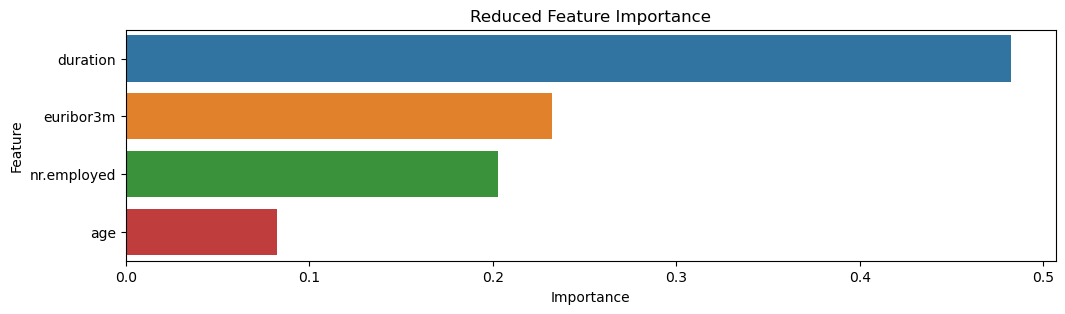

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from scipy.stats import randint

# Veriyi yükle
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Eksik verileri kontrol etme ve doldurma
data.replace('unknown', np.nan, inplace=True)
data.ffill(inplace=True)

# Hedef değişkeni (y) ve bağımsız değişkenleri (X) ayırma
X = data.drop(columns=['y'])
y = data['y']

# Sayısal ve kategorik özellikleri belirleme
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Sayısal ve kategorik özellikler için transformerlar
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Kolon transformerı
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Pipeline oluşturma
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluşturma ve eğitim
pipeline.fit(X_train, y_train)

# Özellik önem derecelerini hesaplama
importances = pipeline.named_steps['classifier'].feature_importances_
feature_names = numeric_features + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Eşik değer belirleme
threshold = 0.05
low_importance_features = feature_importance_df[feature_importance_df['Importance'] < threshold]['Feature'].tolist()
important_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

# Ön işlenmiş veri setini yeniden oluşturma
X_processed = pipeline.named_steps['preprocessor'].transform(X)
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

# Önemli özellikleri seçme
X_reduced = X_processed_df[important_features]

# Veriyi eğitim ve test setlerine yeniden bölme
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Yeni modeli eğitim ve değerlendirme
pipeline_reduced = Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])

# Randomized Search CV
param_distributions = {
    'classifier__n_estimators': randint(100, 300),
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': randint(2, 11),
    'classifier__min_samples_leaf': randint(1, 5),
    'classifier__bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=pipeline_reduced, param_distributions=param_distributions,
                                   n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Randomized Search CV fit
random_search.fit(X_train_reduced, y_train)

# En iyi parametreler
print("Best parameters found: ", random_search.best_params_)

# En iyi modeli al
best_model_reduced = random_search.best_estimator_

# Test seti üzerinde tahmin yapma
y_pred_reduced = best_model_reduced.predict(X_test_reduced)

# Modelin performansını değerlendirme
print("Classification Report:")
print(classification_report(y_test, y_pred_reduced))

print("Accuracy Score:", accuracy_score(y_test, y_pred_reduced))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_reduced))

# Yeni özellik önem skorlarını görselleştirme
importances_reduced = best_model_reduced.named_steps['classifier'].feature_importances_
feature_importance_reduced_df = pd.DataFrame({'Feature': important_features, 'Importance': importances_reduced}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 3))
sns.barplot(x='Importance', y='Feature', data=feature_importance_reduced_df)
plt.title('Reduced Feature Importance')
plt.show()


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Veriyi yükle
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Eksik verileri kontrol etme ve doldurma
data.replace('unknown', np.nan, inplace=True)
data.ffill(inplace=True)

# Hedef değişkeni (y) ve bağımsız değişkenleri (X) ayırma
X = data.drop(columns=['y'])
y = data['y']

# Sayısal ve kategorik özellikleri belirleme
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Sayısal ve kategorik özellikler için transformerlar
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Kolon transformerı
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Pipeline oluşturma
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Veriyi ön işleme tabi tutma
X_processed = pipeline.fit_transform(X)

# Özellik isimlerini elde etme
feature_names = numeric_features + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))

# Veriyi Pandas DataFrame'e dönüştürme
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

# Önceden belirlenen önemli özellikleri seçme
important_features = feature_names  # Tüm özellikleri kullanacağız

# Önemli özelliklerle yeni veri seti oluşturma
X_reduced = X_processed_df[important_features]

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# KNN Modeli oluşturma
knn = KNeighborsClassifier()

# Hiperparametre grid
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Grid Search CV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, 
                           cv=3, n_jobs=2, verbose=2)

# Grid Search CV fit
grid_search.fit(X_train, y_train)

# En iyi parametreler
print("Best parameters found: ", grid_search.best_params_)

# En iyi modeli al
best_knn = grid_search.best_estimator_

# Test seti üzerinde tahmin yapma
y_pred_knn = best_knn.predict(X_test)

# Modelin performansını değerlendirme
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Accuracy Score:", accuracy_score(y_test, y_pred_knn))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


Fitting 3 folds for each of 180 candidates, totalling 540 fits
Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 16, 'weights': 'distance'}
Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.63      0.42      0.50       935

    accuracy                           0.91      8238
   macro avg       0.78      0.69      0.72      8238
weighted avg       0.89      0.91      0.90      8238

Accuracy Score: 0.9058023792182569
Confusion Matrix:
[[7073  230]
 [ 546  389]]


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from scipy.stats import randint

# Veriyi yükle
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Eksik verileri kontrol etme ve doldurma
data.replace('unknown', np.nan, inplace=True)
data.ffill(inplace=True)

# Hedef değişkeni (y) ve bağımsız değişkenleri (X) ayırma
X = data.drop(columns=['y'])
y = data['y']

# Sayısal ve kategorik özellikleri belirleme
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Sayısal ve kategorik özellikler için transformerlar
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Kolon transformerı
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Pipeline oluşturma
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluşturma ve eğitim
pipeline.fit(X_train, y_train)

# Özellik önem derecelerini hesaplama
importances = pipeline.named_steps['classifier'].feature_importances_
feature_names = numeric_features + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Eşik değer belirleme
threshold = 0.01
important_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

# Ön işlenmiş veri setini yeniden oluşturma
X_processed = pipeline.named_steps['preprocessor'].transform(X)
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

# Önemli özelliklerle yeni veri seti oluşturma
X_reduced = X_processed_df[important_features]

# Veriyi eğitim ve test setlerine yeniden bölme
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# KNN Modeli oluşturma
knn = KNeighborsClassifier()

# Hiperparametre grid
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Grid Search CV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, 
                           cv=3, n_jobs=2, verbose=2)

# Grid Search CV fit
grid_search.fit(X_train_reduced, y_train)

# En iyi parametreler
print("Best parameters found: ", grid_search.best_params_)

# En iyi modeli al
best_knn = grid_search.best_estimator_

# Test seti üzerinde tahmin yapma
y_pred_knn = best_knn.predict(X_test_reduced)

# Modelin performansını değerlendirme
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Accuracy Score:", accuracy_score(y_test, y_pred_knn))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


Fitting 3 folds for each of 180 candidates, totalling 540 fits
Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 27, 'weights': 'uniform'}
Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.64      0.39      0.48       935

    accuracy                           0.91      8238
   macro avg       0.78      0.68      0.72      8238
weighted avg       0.89      0.91      0.90      8238

Accuracy Score: 0.9055596018451081
Confusion Matrix:
[[7097  206]
 [ 572  363]]


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Veriyi yükle
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Eksik verileri kontrol etme ve doldurma
data.replace('unknown', np.nan, inplace=True)
data.ffill(inplace=True)

# Hedef değişkeni (y) ve bağımsız değişkenleri (X) ayırma
X = data.drop(columns=['y'])
y = data['y']

# Sayısal ve kategorik özellikleri belirleme
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Sayısal ve kategorik özellikler için transformerlar
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Kolon transformerı
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Pipeline oluşturma
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluşturma ve eğitim
pipeline.fit(X_train, y_train)

# Özellik önem derecelerini hesaplama
importances = pipeline.named_steps['classifier'].feature_importances_
feature_names = numeric_features + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Eşik değer belirleme
threshold = 0.01
important_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

# Ön işlenmiş veri setini yeniden oluşturma
X_processed = pipeline.named_steps['preprocessor'].transform(X)
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

# Önemli özelliklerle yeni veri seti oluşturma
X_reduced = X_processed_df[important_features]

# Veriyi eğitim ve test setlerine yeniden bölme
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Decision Tree Modeli oluşturma
decision_tree = DecisionTreeClassifier(random_state=42)

# Hiperparametre grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10]
}

# Grid Search CV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, 
                           cv=3, n_jobs=2, verbose=2)

# Grid Search CV fit
grid_search.fit(X_train_reduced, y_train)

# En iyi parametreler
print("Best parameters found: ", grid_search.best_params_)

# En iyi modeli al
best_decision_tree = grid_search.best_estimator_

# Test seti üzerinde tahmin yapma
y_pred_decision_tree = best_decision_tree.predict(X_test_reduced)

# Modelin performansını değerlendirme
print("Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))

print("Accuracy Score:", accuracy_score(y_test, y_pred_decision_tree))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_decision_tree))


Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 20}
Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.96      0.95      7303
         yes       0.61      0.55      0.58       935

    accuracy                           0.91      8238
   macro avg       0.78      0.75      0.76      8238
weighted avg       0.91      0.91      0.91      8238

Accuracy Score: 0.9094440398154892
Confusion Matrix:
[[6976  327]
 [ 419  516]]


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Veriyi yükle
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Eksik verileri kontrol etme ve doldurma
data.replace('unknown', np.nan, inplace=True)
data.ffill(inplace=True)

# Hedef değişkeni (y) ve bağımsız değişkenleri (X) ayırma
X = data.drop(columns=['y'])
y = data['y']

# Sayısal ve kategorik özellikleri belirleme
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Sayısal ve kategorik özellikler için transformerlar
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Kolon transformerı
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Pipeline oluşturma
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluşturma ve eğitim
pipeline.fit(X_train, y_train)

# Özellik önem derecelerini hesaplama
importances = pipeline.named_steps['classifier'].feature_importances_
feature_names = numeric_features + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Eşik değer belirleme
threshold = 0.01
important_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

# Ön işlenmiş veri setini yeniden oluşturma
X_processed = pipeline.named_steps['preprocessor'].transform(X)
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

# Önemli özelliklerle yeni veri seti oluşturma
X_reduced = X_processed_df[important_features]

# Farklı random state değerleri için model performansını değerlendirme
random_states = range(0, 42)
results = []

for random_state in random_states:
    # Veriyi eğitim ve test setlerine yeniden bölme
    X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=random_state)

    # Decision Tree Modeli oluşturma
    decision_tree = DecisionTreeClassifier(random_state=random_state)

    # Hiperparametre grid
    param_grid = {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4, 10]
    }

    # Grid Search CV
    grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, 
                               cv=3, n_jobs=2, verbose=2)

    # Grid Search CV fit
    grid_search.fit(X_train_reduced, y_train)

    # En iyi modeli al
    best_decision_tree = grid_search.best_estimator_

    # Test seti üzerinde tahmin yapma
    y_pred_decision_tree = best_decision_tree.predict(X_test_reduced)

    # Modelin performansını değerlendirme
    accuracy = accuracy_score(y_test, y_pred_decision_tree)
    results.append((random_state, accuracy))

# Sonuçları yazdırma
for random_state, accuracy in results:
    print(f"Random state: {random_state}, Accuracy: {accuracy:.4f}")


Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Veri setinin %10'unu kullanma
data_sampled = data.sample(frac=0.8, random_state=42)
X_sampled = data_sampled.drop(columns=['y'])
y_sampled = data_sampled['y']

# Sayısal ve kategorik özellikleri belirleme
numeric_features = X_sampled.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_sampled.select_dtypes(include=['object']).columns.tolist()

# Sayısal ve kategorik özellikler için transformerlar
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Kolon transformerı
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Ön işleme adımı için pipeline oluşturma
preprocessor_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Veriyi ön işleme tabi tutma
X_processed_sampled = preprocessor_pipeline.fit_transform(X_sampled)

# Özellik isimlerini elde etme
feature_names = numeric_features + list(preprocessor_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))

# Veriyi Pandas DataFrame'e dönüştürme
X_processed_df_sampled = pd.DataFrame(X_processed_sampled, columns=feature_names)

# Önceden belirlenen önemli özellikleri seçme
threshold = 0.01
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_processed_sampled, y_sampled)
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
important_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

# Önemli özelliklerle yeni veri seti oluşturma
X_reduced_sampled = X_processed_df_sampled[important_features]

# Veriyi eğitim ve test setlerine yeniden bölme
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced_sampled, y_sampled, test_size=0.2, random_state=42)

# SVM Modeli oluşturma
svm = SVC()

# Hiperparametre grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01],
    'kernel': ['linear', 'rbf']
}

# Grid Search CV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, 
                           cv=3, n_jobs=2, verbose=2)

# Grid Search CV fit
grid_search.fit(X_train_reduced, y_train)

# En iyi parametreler
print("Best parameters found: ", grid_search.best_params_)

# En iyi modeli al
best_svm = grid_search.best_estimator_

# Test seti üzerinde tahmin yapma
y_pred_svm = best_svm.predict(X_test_reduced)

# Modelin performansını değerlendirme
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("Accuracy Score:", accuracy_score(y_test, y_pred_svm))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.97      0.95      5849
         yes       0.63      0.37      0.46       741

    accuracy                           0.90      6590
   macro avg       0.78      0.67      0.70      6590
weighted avg       0.89      0.90      0.89      6590

Accuracy Score: 0.9044006069802731
Confusion Matrix:
[[5689  160]
 [ 470  271]]


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7303
         yes       0.65      0.33      0.44       935

    accuracy                           0.90      8238
   macro avg       0.79      0.65      0.69      8238
weighted avg       0.89      0.90      0.89      8238

Accuracy Score: 0.9042243262927895
Confusion Matrix:
[[7140  163]
 [ 626  309]]


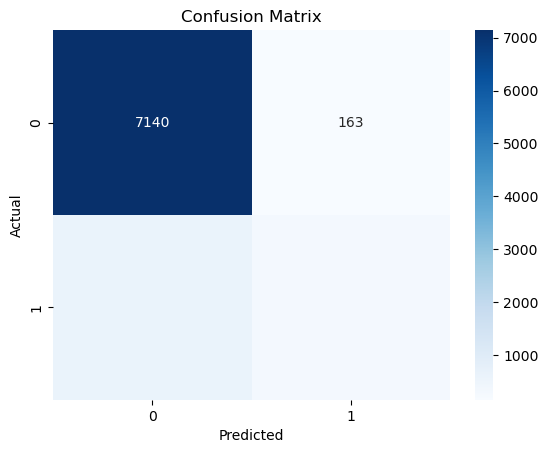

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Veriyi yükle
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Eksik verileri kontrol etme ve doldurma
data.replace('unknown', np.nan, inplace=True)
data.ffill(inplace=True)

# Hedef değişkeni (y) ve bağımsız değişkenleri (X) ayırma
X = data.drop(columns=['y'])
y = data['y']

# Sayısal ve kategorik özellikleri belirleme
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Sayısal ve kategorik özellikler için transformerlar
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Kolon transformerı
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Pipeline oluşturma
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Veriyi ön işleme tabi tutma
X_processed = pipeline.fit_transform(X)

# Özellik isimlerini elde etme
feature_names = numeric_features + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))

# Veriyi Pandas DataFrame'e dönüştürme
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

# Önceden belirlenen önemli özellikleri seçme
threshold = 0.05
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_processed, y)
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
important_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

# Önemli özelliklerle yeni veri seti oluşturma
X_reduced = X_processed_df[important_features]

# Veriyi eğitim ve test setlerine yeniden bölme
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Logistic Regression Modeli oluşturma
log_reg = LogisticRegression(max_iter=10000)

# Hiperparametre grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Grid Search CV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, 
                           cv=3, n_jobs=2, verbose=2)

# Grid Search CV fit
grid_search.fit(X_train_reduced, y_train)

# En iyi parametreler
print("Best parameters found: ", grid_search.best_params_)

# En iyi modeli al
best_log_reg = grid_search.best_estimator_

# Test seti üzerinde tahmin yapma
y_pred_log_reg = best_log_reg.predict(X_test_reduced)

# Modelin performansını değerlendirme
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("Accuracy Score:", accuracy_score(y_test, y_pred_log_reg))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# Confusion matrix görselleştirme
cm = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Veriyi yükle
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Eksik verileri kontrol etme ve doldurma
data.replace('unknown', np.nan, inplace=True)
data.ffill(inplace=True)

# Hedef değişkeni (y) ve bağımsız değişkenleri (X) ayırma
X = data.drop(columns=['y'])
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # İkili sınıflandırma için y'yi 0 ve 1 olarak kodlayın

# Sayısal ve kategorik özellikleri belirleme
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Sayısal ve kategorik özellikler için transformerlar
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Kolon transformerı
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Pipeline oluşturma
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Veriyi ön işleme tabi tutma
X_processed = pipeline.fit_transform(X)

# Özellik isimlerini elde etme
feature_names = numeric_features + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))

# Veriyi Pandas DataFrame'e dönüştürme
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

# Önceden belirlenen önemli özellikleri seçme
threshold = 0.01
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_processed, y)
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
important_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

# Önemli özelliklerle yeni veri seti oluşturma
X_reduced = X_processed_df[important_features]

# Veriyi eğitim ve test setlerine yeniden bölme
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# ANN modeli oluşturma işlevi
def create_model(optimizer='adam', init='uniform', dropout_rate=0.0, neurons=32):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_reduced.shape[1], kernel_initializer=init, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# KerasClassifier'ı oluşturma
model = KerasClassifier(build_fn=create_model, verbose=0)

# Hiperparametre grid
param_grid = {
    'batch_size': [10, 20],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop'],
    'init': ['uniform', 'normal'],
    'dropout_rate': [0.0, 0.1, 0.2],
    'neurons': [32, 64, 128]
}

# Grid Search CV
grid = GridSearchCV(estimator=model, param_grid=param_grid, 
                    cv=3, n_jobs=-1, verbose=2)

# Grid Search CV fit
grid_result = grid.fit(X_train_reduced, y_train)

# En iyi parametreler
print("Best parameters found: ", grid_result.best_params_)

# En iyi modeli al
best_ann = grid_result.best_estimator_

# Test seti üzerinde tahmin yapma
y_pred_ann = (best_ann.predict(X_test_reduced) > 0.5).astype("int32")

# Modelin performansını değerlendirme
print("Classification Report:")
print(classification_report(y_test, y_pred_ann))

print("Accuracy Score:", accuracy_score(y_test, y_pred_ann))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Veriyi yükle
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Eksik verileri kontrol etme ve doldurma
data.replace('unknown', np.nan, inplace=True)
data.ffill(inplace=True)

# Hedef değişkeni (y) ve bağımsız değişkenleri (X) ayırma
X = data.drop(columns=['y'])
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # İkili sınıflandırma için y'yi 0 ve 1 olarak kodlayın

# Kategorik değişkenleri dummy değişkenlere dönüştürme
X = pd.get_dummies(X, drop_first=True)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verinin numpy array'e dönüştürülmesi
X_train_sm = sm.add_constant(X_train).astype(float)  # Sabit terim ekleme ve float'a çevirme
y_train = y_train.astype(float)

# Statsmodels kullanarak lojistik regresyon modeli oluşturma
model = sm.Logit(y_train, X_train_sm).fit()

# AIC değerini elde etme
aic_value = model.aic
print(f'AIC değeri: {aic_value}')


Optimization terminated successfully.
         Current function value: 0.207360
         Iterations 16
AIC değeri: 13761.017402924386


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Veriyi yükle
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Eksik verileri kontrol etme ve doldurma
data.replace('unknown', np.nan, inplace=True)
data.ffill(inplace=True)

# Hedef değişkeni (y) ve bağımsız değişkenleri (X) ayırma
X = data.drop(columns=['y'])
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # İkili sınıflandırma için y'yi 0 ve 1 olarak kodlayın

# Sayısal ve kategorik özellikleri belirleme
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Sayısal ve kategorik özellikler için transformerlar
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Kolon transformerı
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Pipeline oluşturma
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(max_iter=10000))])

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğitme
pipeline.fit(X_train, y_train)

# Tahmin yapma
y_pred = pipeline.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Sensitivity, Specificity ve Risk hesaplama
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
risk = (fp + fn) / len(y_test)

print("Confusion Matrix:")
print(cm)
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Risk: {risk}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[7098  205]
 [ 537  398]]
Sensitivity: 0.42566844919786095
Specificity: 0.9719293441051623
Risk: 0.09007040543821315
Accuracy: 0.9099295945617868
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.66      0.43      0.52       935

    accuracy                           0.91      8238
   macro avg       0.79      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

# Veriyi yükle
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Eksik verileri kontrol etme ve doldurma
data.replace('unknown', np.nan, inplace=True)
data.ffill(inplace=True)

# Hedef değişkeni (y) ve bağımsız değişkenleri (X) ayırma
X = data.drop(columns=['y'])
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # İkili sınıflandırma için y'yi 0 ve 1 olarak kodlayın

# Sayısal ve kategorik özellikleri belirleme
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Sayısal ve kategorik özellikler için transformerlar
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Kolon transformerı
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Pipeline oluşturma
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000))])

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğitim seti üzerinde eğitme
pipeline.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = pipeline.predict(X_test)

# Modelin performansını değerlendirme
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Skoru
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.66      0.43      0.52       935

    accuracy                           0.91      8238
   macro avg       0.79      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238

Accuracy Score: 0.9099295945617868
Confusion Matrix:
[[7098  205]
 [ 537  398]]
ROC-AUC Score: 0.9351071752067315


In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

# Veriyi yükle
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Hedef değişkeni (y) ve bağımsız değişkenleri (X) ayırma
X = data.drop(columns=['y'])
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Sayısal ve kategorik özellikleri belirleme
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Sayısal ve kategorik özellikler için transformerlar
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Kolon transformerı
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Pipeline oluşturma
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Veriyi ön işleme tabi tutma
X_processed = pipeline.fit_transform(X)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# 1. SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test)

report_smote = classification_report(y_test, y_pred_smote)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)

# 2. Random Under-sampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

model_rus = RandomForestClassifier(random_state=42)
model_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = model_rus.predict(X_test)

report_rus = classification_report(y_test, y_pred_rus)
accuracy_rus = accuracy_score(y_test, y_pred_rus)
conf_matrix_rus = confusion_matrix(y_test, y_pred_rus)

# 3. Class Weighting
model_cw = RandomForestClassifier(random_state=42, class_weight='balanced')
model_cw.fit(X_train, y_train)
y_pred_cw = model_cw.predict(X_test)

report_cw = classification_report(y_test, y_pred_cw)
accuracy_cw = accuracy_score(y_test, y_pred_cw)
conf_matrix_cw = confusion_matrix(y_test, y_pred_cw)

# 4. SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_train_st, y_train_st = smote_tomek.fit_resample(X_train, y_train)

model_st = RandomForestClassifier(random_state=42)
model_st.fit(X_train_st, y_train_st)
y_pred_st = model_st.predict(X_test)

report_st = classification_report(y_test, y_pred_st)
accuracy_st = accuracy_score(y_test, y_pred_st)
conf_matrix_st = confusion_matrix(y_test, y_pred_st)

(results_smote, results_rus, results_cw, results_st) = (
    (report_smote, accuracy_smote, conf_matrix_smote),
    (report_rus, accuracy_rus, conf_matrix_rus),
    (report_cw, accuracy_cw, conf_matrix_cw),
    (report_st, accuracy_st, conf_matrix_st),
)

results_smote, results_rus, results_cw, results_st


(('              precision    recall  f1-score   support\n\n           0       0.95      0.94      0.95      7303\n           1       0.58      0.60      0.59       935\n\n    accuracy                           0.91      8238\n   macro avg       0.76      0.77      0.77      8238\nweighted avg       0.91      0.91      0.91      8238\n',
  0.9050740470988103,
  array([[6892,  411],
         [ 371,  564]], dtype=int64)),
 ('              precision    recall  f1-score   support\n\n           0       0.99      0.84      0.91      7303\n           1       0.43      0.93      0.59       935\n\n    accuracy                           0.85      8238\n   macro avg       0.71      0.88      0.75      8238\nweighted avg       0.93      0.85      0.87      8238\n',
  0.852998300558388,
  array([[6162, 1141],
         [  70,  865]], dtype=int64)),
 ('              precision    recall  f1-score   support\n\n           0       0.93      0.97      0.95      7303\n           1       0.65      0.42     

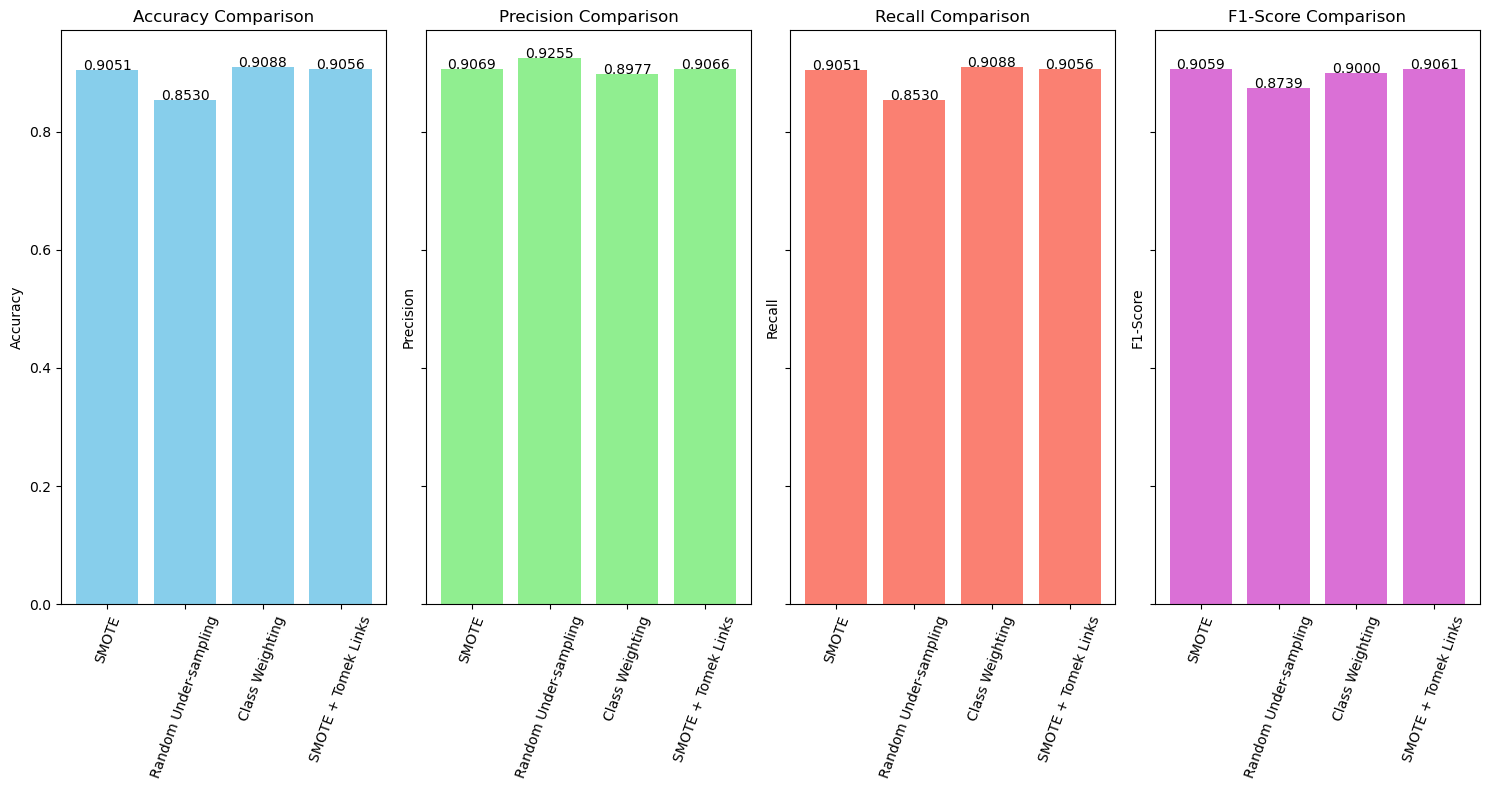

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Performans metriklerini bir DataFrame olarak saklama
results_df = pd.DataFrame({
    'Method': ['SMOTE', 'Random Under-sampling', 'Class Weighting', 'SMOTE + Tomek Links'],
    'Accuracy': [accuracy_smote, accuracy_rus, accuracy_cw, accuracy_st],
    'Precision': [
        classification_report(y_test, y_pred_smote, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_rus, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_cw, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_st, output_dict=True)['weighted avg']['precision']
    ],
    'Recall': [
        classification_report(y_test, y_pred_smote, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_rus, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_cw, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_st, output_dict=True)['weighted avg']['recall']
    ],
    'F1-Score': [
        classification_report(y_test, y_pred_smote, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_rus, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_cw, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_st, output_dict=True)['weighted avg']['f1-score']
    ]
})

# Performans metriklerini görselleştirme
fig, axes = plt.subplots(1, 4, figsize=(15, 8), sharey=True)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightgreen', 'salmon', 'orchid']

for i, metric in enumerate(metrics):
    axes[i].bar(results_df['Method'], results_df[metric], color=colors[i])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xticks(np.arange(len(results_df['Method'])))
    axes[i].set_xticklabels(results_df['Method'], rotation=70)
    for j in range(len(results_df)):
        axes[i].text(j, results_df[metric][j], f"{results_df[metric][j]:.4f}", ha='center')

plt.tight_layout()
plt.show()


In [67]:
# Performans metrikleri tablosu
performance_table = results_df.copy()
performance_table.set_index('Method', inplace=True)
print(performance_table)

                       Accuracy  Precision    Recall  F1-Score
Method                                                        
SMOTE                  0.905074   0.906873  0.905074  0.905938
Random Under-sampling  0.852998   0.925485  0.852998  0.873949
Class Weighting        0.908837   0.897673  0.908837  0.899978
SMOTE + Tomek Links    0.905560   0.906627  0.905560  0.906080


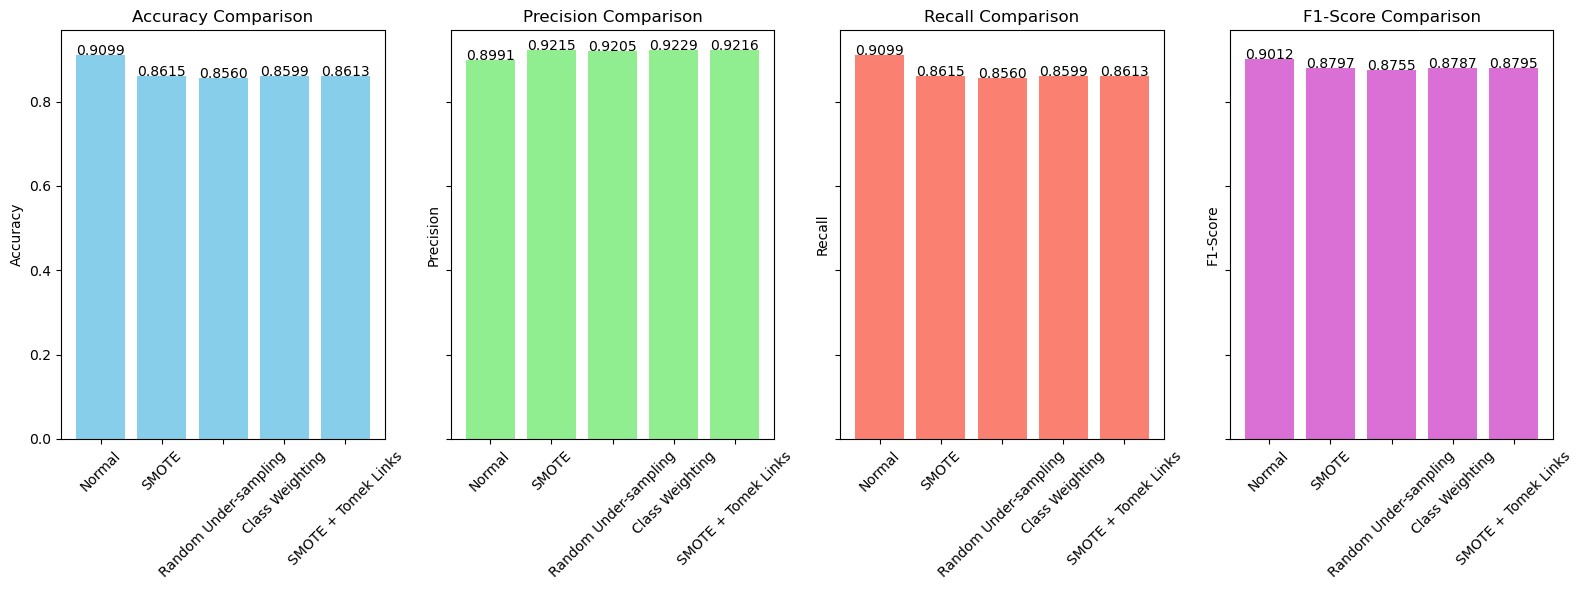

                       Accuracy  Precision    Recall  F1-Score
Method                                                        
Normal                 0.909930   0.899063  0.909930  0.901209
SMOTE                  0.861496   0.921532  0.861496  0.879665
Random Under-sampling  0.856033   0.920513  0.856033  0.875476
Class Weighting        0.859917   0.922851  0.859917  0.878706
SMOTE + Tomek Links    0.861253   0.921613  0.861253  0.879499


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

# Veriyi yükle
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Eksik verileri kontrol etme ve doldurma
data.replace('unknown', np.nan, inplace=True)
data.ffill(inplace=True)

# Hedef değişkeni (y) ve bağımsız değişkenleri (X) ayırma
X = data.drop(columns=['y'])
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # İkili sınıflandırma için y'yi 0 ve 1 olarak kodlayın

# Sayısal ve kategorik özellikleri belirleme
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Sayısal ve kategorik özellikler için transformerlar
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Kolon transformerı
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Veriyi ön işleme tabi tutma
X_processed = preprocessor.fit_transform(X)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Normal Hal
model_normal = LogisticRegression(max_iter=1000)
model_normal.fit(X_train, y_train)
y_pred_normal = model_normal.predict(X_test)
accuracy_normal = accuracy_score(y_test, y_pred_normal)

# 1. SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)

# 2. Random Under-sampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

model_rus = LogisticRegression(max_iter=1000)
model_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = model_rus.predict(X_test)
accuracy_rus = accuracy_score(y_test, y_pred_rus)

# 3. Class Weighting
model_cw = LogisticRegression(class_weight='balanced', max_iter=1000)
model_cw.fit(X_train, y_train)
y_pred_cw = model_cw.predict(X_test)
accuracy_cw = accuracy_score(y_test, y_pred_cw)

# 4. SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_train_st, y_train_st = smote_tomek.fit_resample(X_train, y_train)

model_st = LogisticRegression(max_iter=1000)
model_st.fit(X_train_st, y_train_st)
y_pred_st = model_st.predict(X_test)
accuracy_st = accuracy_score(y_test, y_pred_st)

# Performans metriklerini bir DataFrame olarak saklama
results_df = pd.DataFrame({
    'Method': ['Normal', 'SMOTE', 'Random Under-sampling', 'Class Weighting', 'SMOTE + Tomek Links'],
    'Accuracy': [accuracy_normal, accuracy_smote, accuracy_rus, accuracy_cw, accuracy_st],
    'Precision': [
        classification_report(y_test, y_pred_normal, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_smote, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_rus, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_cw, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_st, output_dict=True)['weighted avg']['precision']
    ],
    'Recall': [
        classification_report(y_test, y_pred_normal, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_smote, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_rus, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_cw, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_st, output_dict=True)['weighted avg']['recall']
    ],
    'F1-Score': [
        classification_report(y_test, y_pred_normal, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_smote, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_rus, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_cw, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_st, output_dict=True)['weighted avg']['f1-score']
    ]
})

# Performans metriklerini görselleştirme
fig, axes = plt.subplots(1, 4, figsize=(16, 6), sharey=True)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightgreen', 'salmon', 'orchid']

for i, metric in enumerate(metrics):
    axes[i].bar(results_df['Method'], results_df[metric], color=colors[i])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xticks(np.arange(len(results_df['Method'])))
    axes[i].set_xticklabels(results_df['Method'], rotation=45)
    for j in range(len(results_df)):
        axes[i].text(j, results_df[metric][j], f"{results_df[metric][j]:.4f}", ha='center')

plt.tight_layout()
plt.show()

# Performans metrikleri tablosu
performance_table = results_df.copy()
performance_table.set_index('Method', inplace=True)
print(performance_table)


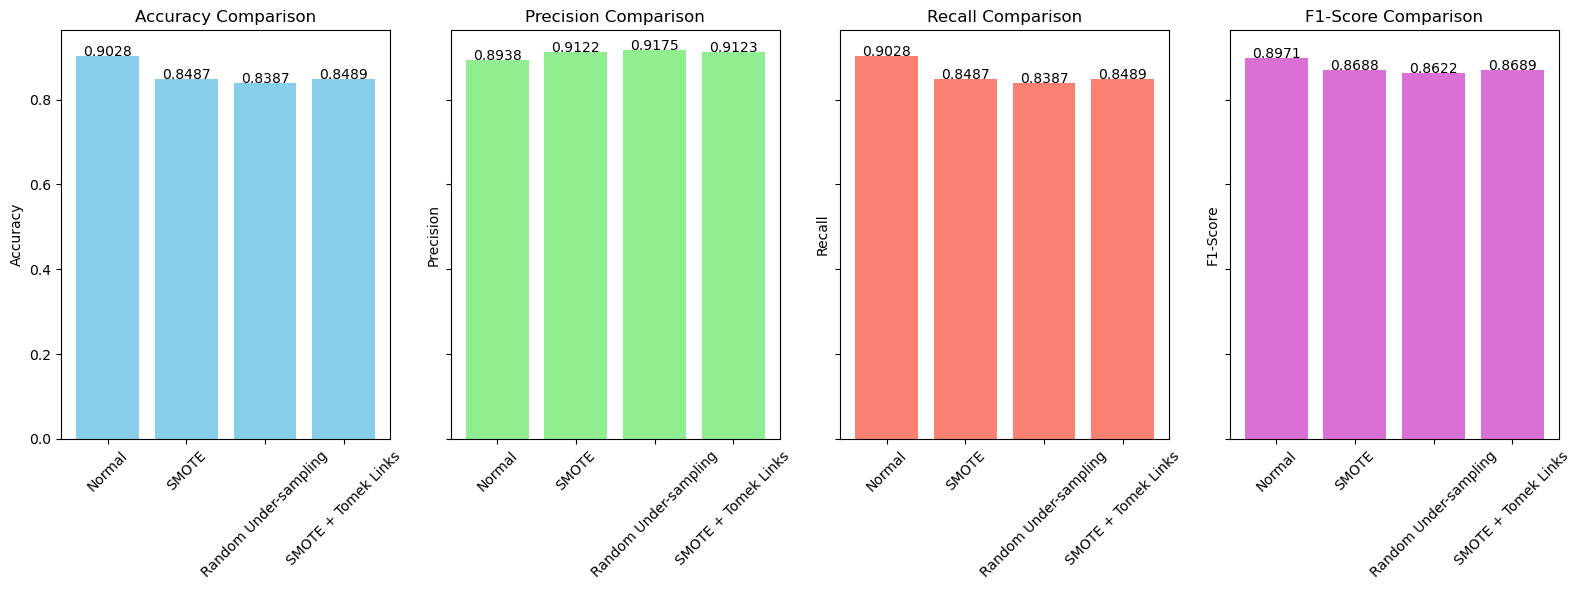

                       Accuracy  Precision    Recall  F1-Score
Method                                                        
Normal                 0.902768   0.893838  0.902768  0.897097
SMOTE                  0.848750   0.912237  0.848750  0.868798
Random Under-sampling  0.838674   0.917462  0.838674  0.862201
SMOTE + Tomek Links    0.848871   0.912265  0.848871  0.868891


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

# Veriyi yükle
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Eksik verileri kontrol etme ve doldurma
data.replace('unknown', np.nan, inplace=True)
data.ffill(inplace=True)

# Hedef değişkeni (y) ve bağımsız değişkenleri (X) ayırma
X = data.drop(columns=['y'])
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # İkili sınıflandırma için y'yi 0 ve 1 olarak kodlayın

# Sayısal ve kategorik özellikleri belirleme
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Sayısal ve kategorik özellikler için transformerlar
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Kolon transformerı
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Veriyi ön işleme tabi tutma
X_processed = preprocessor.fit_transform(X)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Normal Hal
model_normal = KNeighborsClassifier()
model_normal.fit(X_train, y_train)
y_pred_normal = model_normal.predict(X_test)
accuracy_normal = accuracy_score(y_test, y_pred_normal)

# 1. SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_smote = KNeighborsClassifier()
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)

# 2. Random Under-sampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

model_rus = KNeighborsClassifier()
model_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = model_rus.predict(X_test)
accuracy_rus = accuracy_score(y_test, y_pred_rus)

# 3. Class Weighting
# KNN algoritması class_weight parametresini desteklemez, bu nedenle bu adımı atlıyoruz

# 4. SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_train_st, y_train_st = smote_tomek.fit_resample(X_train, y_train)

model_st = KNeighborsClassifier()
model_st.fit(X_train_st, y_train_st)
y_pred_st = model_st.predict(X_test)
accuracy_st = accuracy_score(y_test, y_pred_st)

# Performans metriklerini bir DataFrame olarak saklama
results_df = pd.DataFrame({
    'Method': ['Normal', 'SMOTE', 'Random Under-sampling', 'SMOTE + Tomek Links'],
    'Accuracy': [accuracy_normal, accuracy_smote, accuracy_rus, accuracy_st],
    'Precision': [
        classification_report(y_test, y_pred_normal, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_smote, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_rus, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_st, output_dict=True)['weighted avg']['precision']
    ],
    'Recall': [
        classification_report(y_test, y_pred_normal, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_smote, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_rus, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_st, output_dict=True)['weighted avg']['recall']
    ],
    'F1-Score': [
        classification_report(y_test, y_pred_normal, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_smote, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_rus, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_st, output_dict=True)['weighted avg']['f1-score']
    ]
})

# Performans metriklerini görselleştirme
fig, axes = plt.subplots(1, 4, figsize=(16, 6), sharey=True)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightgreen', 'salmon', 'orchid']

for i, metric in enumerate(metrics):
    axes[i].bar(results_df['Method'], results_df[metric], color=colors[i])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xticks(np.arange(len(results_df['Method'])))
    axes[i].set_xticklabels(results_df['Method'], rotation=45)
    for j in range(len(results_df)):
        axes[i].text(j, results_df[metric][j], f"{results_df[metric][j]:.4f}", ha='center')

plt.tight_layout()
plt.show()

# Performans metrikleri tablosu
performance_table = results_df.copy()
performance_table.set_index('Method', inplace=True)
print(performance_table)


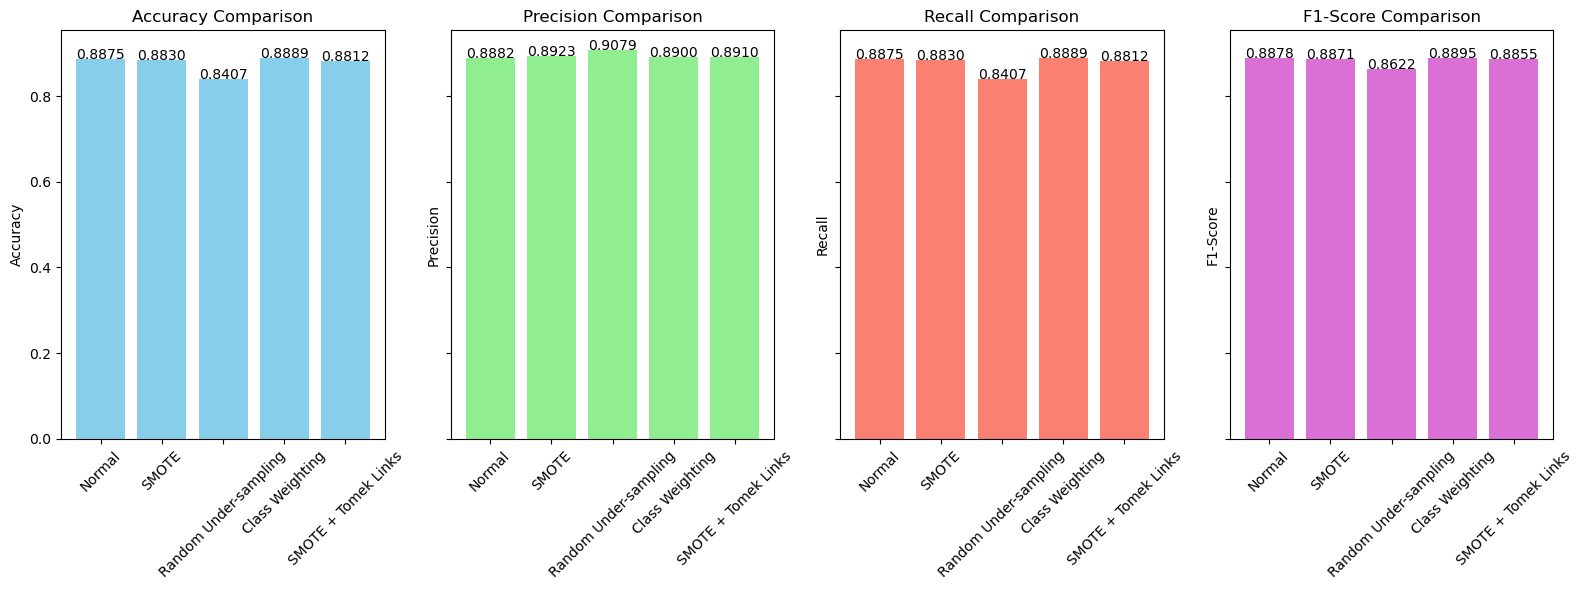

                       Accuracy  Precision    Recall  F1-Score
Method                                                        
Normal                 0.887473   0.888156  0.887473  0.887811
SMOTE                  0.882981   0.892308  0.882981  0.887124
Random Under-sampling  0.840738   0.907939  0.840738  0.862247
Class Weighting        0.888929   0.890021  0.888929  0.889466
SMOTE + Tomek Links    0.881160   0.891005  0.881160  0.885525


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

# Veriyi yükle
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Eksik verileri kontrol etme ve doldurma
data.replace('unknown', np.nan, inplace=True)
data.ffill(inplace=True)

# Hedef değişkeni (y) ve bağımsız değişkenleri (X) ayırma
X = data.drop(columns=['y'])
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # İkili sınıflandırma için y'yi 0 ve 1 olarak kodlayın

# Sayısal ve kategorik özellikleri belirleme
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Sayısal ve kategorik özellikler için transformerlar
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Kolon transformerı
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Veriyi ön işleme tabi tutma
X_processed = preprocessor.fit_transform(X)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Normal Hal
model_normal = DecisionTreeClassifier(random_state=42)
model_normal.fit(X_train, y_train)
y_pred_normal = model_normal.predict(X_test)
accuracy_normal = accuracy_score(y_test, y_pred_normal)

# 1. SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_smote = DecisionTreeClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)

# 2. Random Under-sampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

model_rus = DecisionTreeClassifier(random_state=42)
model_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = model_rus.predict(X_test)
accuracy_rus = accuracy_score(y_test, y_pred_rus)

# 3. Class Weighting
model_cw = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model_cw.fit(X_train, y_train)
y_pred_cw = model_cw.predict(X_test)
accuracy_cw = accuracy_score(y_test, y_pred_cw)

# 4. SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_train_st, y_train_st = smote_tomek.fit_resample(X_train, y_train)

model_st = DecisionTreeClassifier(random_state=42)
model_st.fit(X_train_st, y_train_st)
y_pred_st = model_st.predict(X_test)
accuracy_st = accuracy_score(y_test, y_pred_st)

# Performans metriklerini bir DataFrame olarak saklama
results_df = pd.DataFrame({
    'Method': ['Normal', 'SMOTE', 'Random Under-sampling', 'Class Weighting', 'SMOTE + Tomek Links'],
    'Accuracy': [accuracy_normal, accuracy_smote, accuracy_rus, accuracy_cw, accuracy_st],
    'Precision': [
        classification_report(y_test, y_pred_normal, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_smote, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_rus, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_cw, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_st, output_dict=True)['weighted avg']['precision']
    ],
    'Recall': [
        classification_report(y_test, y_pred_normal, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_smote, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_rus, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_cw, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_st, output_dict=True)['weighted avg']['recall']
    ],
    'F1-Score': [
        classification_report(y_test, y_pred_normal, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_smote, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_rus, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_cw, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_st, output_dict=True)['weighted avg']['f1-score']
    ]
})

# Performans metriklerini görselleştirme
fig, axes = plt.subplots(1, 4, figsize=(16, 6), sharey=True)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightgreen', 'salmon', 'orchid']

for i, metric in enumerate(metrics):
    axes[i].bar(results_df['Method'], results_df[metric], color=colors[i])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xticks(np.arange(len(results_df['Method'])))
    axes[i].set_xticklabels(results_df['Method'], rotation=45)
    for j in range(len(results_df)):
        axes[i].text(j, results_df[metric][j], f"{results_df[metric][j]:.4f}", ha='center')

plt.tight_layout()
plt.show()

# Performans metrikleri tablosu
performance_table = results_df.copy()
performance_table.set_index('Method', inplace=True)
print(performance_table)


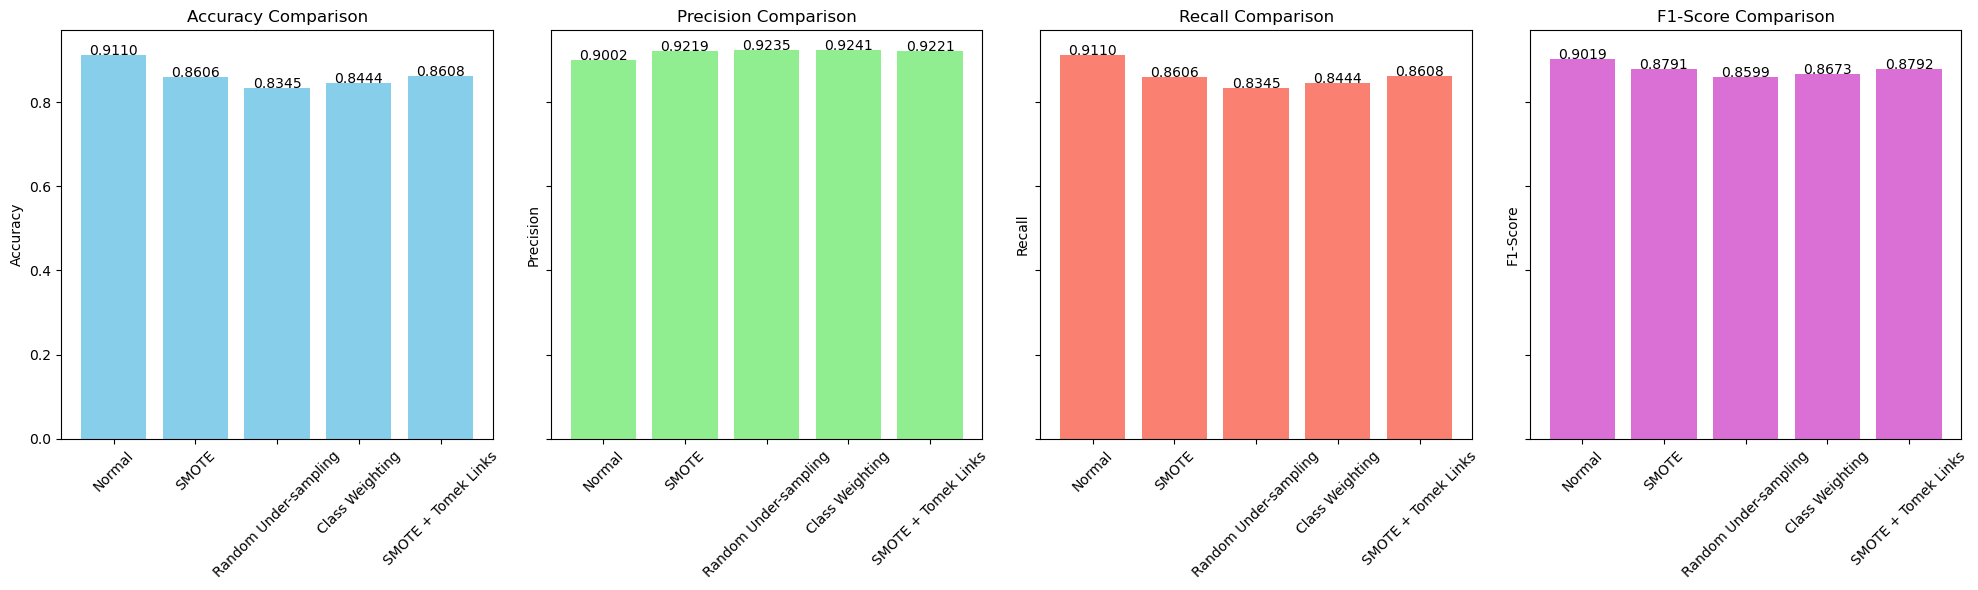

ModuleNotFoundError: No module named 'ace_tools'

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

# Veriyi yükle
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Eksik verileri kontrol etme ve doldurma
data.replace('unknown', np.nan, inplace=True)
data.ffill(inplace=True)

# Hedef değişkeni (y) ve bağımsız değişkenleri (X) ayırma
X = data.drop(columns=['y'])
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # İkili sınıflandırma için y'yi 0 ve 1 olarak kodlayın

# Sayısal ve kategorik özellikleri belirleme
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Sayısal ve kategorik özellikler için transformerlar
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Kolon transformerı
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Veriyi ön işleme tabi tutma
X_processed = preprocessor.fit_transform(X)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Normal Hal
model_normal = SVC()
model_normal.fit(X_train, y_train)
y_pred_normal = model_normal.predict(X_test)
accuracy_normal = accuracy_score(y_test, y_pred_normal)

# 1. SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_smote = SVC()
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)

# 2. Random Under-sampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

model_rus = SVC()
model_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = model_rus.predict(X_test)
accuracy_rus = accuracy_score(y_test, y_pred_rus)

# 3. Class Weighting
model_class_weighting = SVC(class_weight='balanced')
model_class_weighting.fit(X_train, y_train)
y_pred_class_weighting = model_class_weighting.predict(X_test)
accuracy_class_weighting = accuracy_score(y_test, y_pred_class_weighting)

# 4. SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_train_st, y_train_st = smote_tomek.fit_resample(X_train, y_train)

model_st = SVC()
model_st.fit(X_train_st, y_train_st)
y_pred_st = model_st.predict(X_test)
accuracy_st = accuracy_score(y_test, y_pred_st)

# Performans metriklerini bir DataFrame olarak saklama
results_df = pd.DataFrame({
    'Method': ['Normal', 'SMOTE', 'Random Under-sampling', 'Class Weighting', 'SMOTE + Tomek Links'],
    'Accuracy': [accuracy_normal, accuracy_smote, accuracy_rus, accuracy_class_weighting, accuracy_st],
    'Precision': [
        classification_report(y_test, y_pred_normal, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_smote, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_rus, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_class_weighting, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_st, output_dict=True)['weighted avg']['precision']
    ],
    'Recall': [
        classification_report(y_test, y_pred_normal, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_smote, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_rus, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_class_weighting, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_st, output_dict=True)['weighted avg']['recall']
    ],
    'F1-Score': [
        classification_report(y_test, y_pred_normal, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_smote, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_rus, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_class_weighting, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_st, output_dict=True)['weighted avg']['f1-score']
    ]
})

# Performans metriklerini görselleştirme
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightgreen', 'salmon', 'orchid']

for i, metric in enumerate(metrics):
    axes[i].bar(results_df['Method'], results_df[metric], color=colors[i])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xticks(np.arange(len(results_df['Method'])))
    axes[i].set_xticklabels(results_df['Method'], rotation=45)
    for j in range(len(results_df)):
        axes[i].text(j, results_df[metric][j], f"{results_df[metric][j]:.4f}", ha='center')

plt.tight_layout()
plt.show()

# Performans metrikleri tablosu
performance_table = results_df.copy()
performance_table.set_index('Method', inplace=True)
import ace_tools as tools; tools.display_dataframe_to_user(name="SVC Modeli Performans Karşılaştırması", dataframe=performance_table)


In [76]:
# Performans metrikleri tablosu
performance_table = results_df.copy()
performance_table.set_index('Method', inplace=True)
print(performance_table)

                       Accuracy  Precision    Recall  F1-Score
Method                                                        
Normal                 0.911022   0.900170  0.911022  0.901918
SMOTE                  0.860646   0.921890  0.860646  0.879095
Random Under-sampling  0.834547   0.923475  0.834547  0.859903
Class Weighting        0.844380   0.924147  0.844380  0.867340
SMOTE + Tomek Links    0.860767   0.922061  0.860767  0.879211


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Veriyi yükle
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Eksik verileri kontrol etme ve doldurma
data.replace('unknown', np.nan, inplace=True)
data.ffill(inplace=True)

# Hedef değişkeni (y) ve bağımsız değişkenleri (X) ayırma
X = data.drop(columns=['y'])
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # İkili sınıflandırma için y'yi 0 ve 1 olarak kodlayın

# Sayısal ve kategorik özellikleri belirleme
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Sayısal ve kategorik özellikler için transformerlar
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Kolon transformerı
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Veriyi ön işleme tabi tutma
X_processed = preprocessor.fit_transform(X)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# ANN modeli oluşturma işlevi
def create_ann_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 1. Normal Hal
model_normal = create_ann_model(X_train.shape[1])
model_normal.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
y_pred_normal = (model_normal.predict(X_test) > 0.5).astype("int32")
accuracy_normal = accuracy_score(y_test, y_pred_normal)

# 2. SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_smote = create_ann_model(X_train_smote.shape[1])
model_smote.fit(X_train_smote, y_train_smote, epochs=50, batch_size=32, verbose=0)
y_pred_smote = (model_smote.predict(X_test) > 0.5).astype("int32")
accuracy_smote = accuracy_score(y_test, y_pred_smote)

# 3. Random Under-sampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

model_rus = create_ann_model(X_train_rus.shape[1])
model_rus.fit(X_train_rus, y_train_rus, epochs=50, batch_size=32, verbose=0)
y_pred_rus = (model_rus.predict(X_test) > 0.5).astype("int32")
accuracy_rus = accuracy_score(y_test, y_pred_rus)

# 4. Class Weighting
model_class_weighting = create_ann_model(X_train.shape[1])
model_class_weighting.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, class_weight={0: 1, 1: len(y_train)/sum(y_train)})
y_pred_class_weighting = (model_class_weighting.predict(X_test) > 0.5).astype("int32")
accuracy_class_weighting = accuracy_score(y_test, y_pred_class_weighting)

# 5. SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_train_st, y_train_st = smote_tomek.fit_resample(X_train, y_train)

model_st = create_ann_model(X_train_st.shape[1])
model_st.fit(X_train_st, y_train_st, epochs=50, batch_size=32, verbose=0)
y_pred_st = (model_st.predict(X_test) > 0.5).astype("int32")
accuracy_st = accuracy_score(y_test, y_pred_st)

# Performans metriklerini bir DataFrame olarak saklama
results_df = pd.DataFrame({
    'Method': ['Normal', 'SMOTE', 'Random Under-sampling', 'Class Weighting', 'SMOTE + Tomek Links'],
    'Accuracy': [accuracy_normal, accuracy_smote, accuracy_rus, accuracy_class_weighting, accuracy_st],
    'Precision': [
        classification_report(y_test, y_pred_normal, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_smote, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_rus, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_class_weighting, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_st, output_dict=True)['weighted avg']['precision']
    ],
    'Recall': [
        classification_report(y_test, y_pred_normal, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_smote, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_rus, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_class_weighting, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_st, output_dict=True)['weighted avg']['recall']
    ],
    'F1-Score': [
        classification_report(y_test, y_pred_normal, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_smote, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_rus, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_class_weighting, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_st, output_dict=True)['weighted avg']['f1-score']
    ]
})

# Performans metriklerini görselleştirme
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightgreen', 'salmon', 'orchid']

for i, metric in enumerate(metrics):
    axes[i].bar(results_df['Method'], results_df[metric], color=colors[i])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xticks(np.arange(len(results_df['Method'])))
    axes[i].set_xticklabels(results_df['Method'], rotation=45)
    for j in range(len(results_df)):
        axes[i].text(j, results_df[metric][j], f"{results_df[metric][j]:.4f}", ha='center')

plt.tight_layout()
plt.show()

# Performans metrikleri tablosu
performance_table = results_df.copy()
performance_table.set_index('Method', inplace=True)
print(performance_table)


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyError: 1

258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


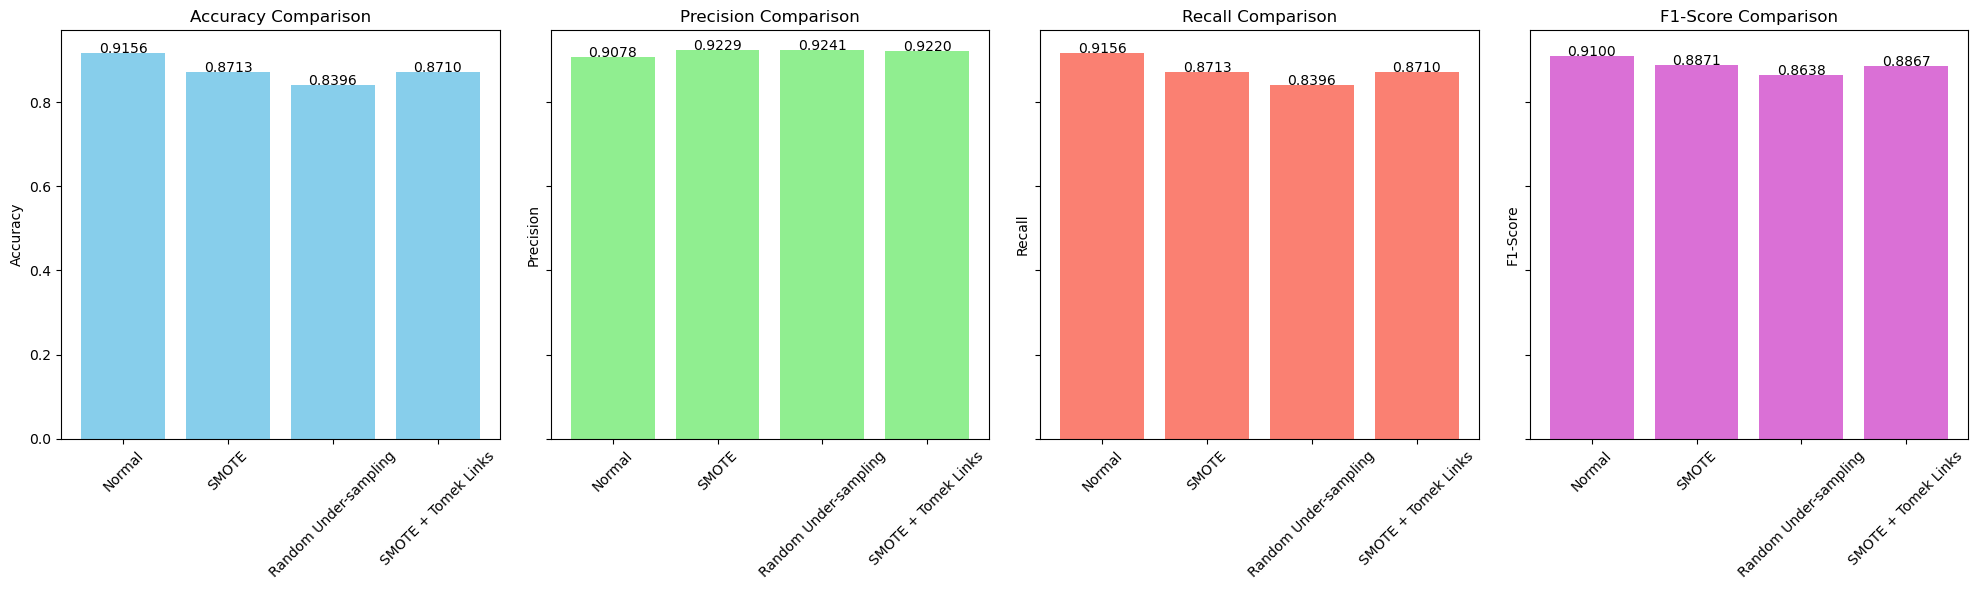

                       Accuracy  Precision    Recall  F1-Score
Method                                                        
Normal                 0.915635   0.907789  0.915635  0.909971
SMOTE                  0.871328   0.922936  0.871328  0.887136
Random Under-sampling  0.839646   0.924127  0.839646  0.863799
SMOTE + Tomek Links    0.870964   0.922021  0.870964  0.886711


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Veriyi yükle
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Eksik verileri kontrol etme ve doldurma
data.replace('unknown', np.nan, inplace=True)
data.ffill(inplace=True)

# Hedef değişkeni (y) ve bağımsız değişkenleri (X) ayırma
X = data.drop(columns=['y'])
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # İkili sınıflandırma için y'yi 0 ve 1 olarak kodlayın

# Sayısal ve kategorik özellikleri belirleme
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Sayısal ve kategorik özellikler için transformerlar
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Kolon transformerı
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Veriyi ön işleme tabi tutma
X_processed = preprocessor.fit_transform(X)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# ANN modeli oluşturma işlevi
def create_ann_model(input_dim):
    model = Sequential()
    model.add(tf.keras.Input(shape=(input_dim,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 1. Normal Hal
model_normal = create_ann_model(X_train.shape[1])
model_normal.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
y_pred_normal = (model_normal.predict(X_test) > 0.5).astype("int32")
accuracy_normal = accuracy_score(y_test, y_pred_normal)

# 2. SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_smote = create_ann_model(X_train_smote.shape[1])
model_smote.fit(X_train_smote, y_train_smote, epochs=50, batch_size=32, verbose=0)
y_pred_smote = (model_smote.predict(X_test) > 0.5).astype("int32")
accuracy_smote = accuracy_score(y_test, y_pred_smote)

# 3. Random Under-sampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

model_rus = create_ann_model(X_train_rus.shape[1])
model_rus.fit(X_train_rus, y_train_rus, epochs=50, batch_size=32, verbose=0)
y_pred_rus = (model_rus.predict(X_test) > 0.5).astype("int32")
accuracy_rus = accuracy_score(y_test, y_pred_rus)

# 4. SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_train_st, y_train_st = smote_tomek.fit_resample(X_train, y_train)

model_st = create_ann_model(X_train_st.shape[1])
model_st.fit(X_train_st, y_train_st, epochs=50, batch_size=32, verbose=0)
y_pred_st = (model_st.predict(X_test) > 0.5).astype("int32")
accuracy_st = accuracy_score(y_test, y_pred_st)

# Performans metriklerini bir DataFrame olarak saklama
results_df = pd.DataFrame({
    'Method': ['Normal', 'SMOTE', 'Random Under-sampling', 'SMOTE + Tomek Links'],
    'Accuracy': [accuracy_normal, accuracy_smote, accuracy_rus, accuracy_st],
    'Precision': [
        classification_report(y_test, y_pred_normal, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_smote, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_rus, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_st, output_dict=True)['weighted avg']['precision']
    ],
    'Recall': [
        classification_report(y_test, y_pred_normal, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_smote, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_rus, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_st, output_dict=True)['weighted avg']['recall']
    ],
    'F1-Score': [
        classification_report(y_test, y_pred_normal, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_smote, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_rus, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_st, output_dict=True)['weighted avg']['f1-score']
    ]
})

# Performans metriklerini görselleştirme
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightgreen', 'salmon', 'orchid']

for i, metric in enumerate(metrics):
    axes[i].bar(results_df['Method'], results_df[metric], color=colors[i])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xticks(np.arange(len(results_df['Method'])))
    axes[i].set_xticklabels(results_df['Method'], rotation=45)
    for j in range(len(results_df)):
        axes[i].text(j, results_df[metric][j], f"{results_df[metric][j]:.4f}", ha='center')

plt.tight_layout()
plt.show()

# Performans metrikleri tablosu
performance_table = results_df.copy()
performance_table.set_index('Method', inplace=True)
print(performance_table)
